###**UAS DEEP LEARNING**
#####Putri Maysa Adira
#####2702372826
#####LB09
#####No 1 (dataset A_1)

## LINK VIDEO : https://drive.google.com/file/d/1yv0-_MCLhKlv3agK7MSGlr_48oqNQx_F/view?usp=sharing

In [ ]:
!pip install -q keras-tuner

## Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras import regularizers

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/2702372826 - UAS Deep Learning/AP003.csv')
df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,2023-03-31 19:00:00,2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50396,2023-03-31 20:00:00,2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50397,2023-03-31 21:00:00,2023-03-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50398,2023-03-31 22:00:00,2023-03-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


memuat dataset dan memeriksa strukturnya

A. Exploratory data analysis untuk mengenali data anda. Anda akan menjelaskan EDA apa yang anda lakukan dan informasi apa yang anda peroleh dengan EDA tersebut, serta alasan mengapa anda
perlu mengetahui informasi tersebut.

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

Memeriksa informasi tentang dataset

In [ ]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,44691.000000,45018.000000,46252.000000,45705.000000,47040.000000,45756.000000,43604.000000,46993.000000,45309.000000,46678.000000,...,46335.000000,46520.000000,46522.000000,44710.000000,47045.000000,43680.000000,47043.000000,46370.000000,47148.000000,46658.000000
mean,46.869591,111.938589,14.817678,34.921808,29.857413,13.813287,12.323789,0.666865,29.118732,3.309707,...,29.408316,73.166650,1.895205,209.078558,127.619004,746.903387,0.017120,27.591552,0.022934,2.649006
std,35.201161,74.285923,22.372042,23.912796,27.042412,14.685377,10.266289,0.550187,29.388645,2.926522,...,3.228845,8.592562,1.199727,67.168061,175.790733,7.656193,0.071902,4.426638,0.282441,8.785483
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000
25%,23.415000,63.330000,2.915000,18.400000,12.670000,7.050000,6.350000,0.330000,9.930000,1.500000,...,27.900000,68.000000,0.880000,157.250000,6.250000,743.000000,0.000000,24.830000,0.000000,0.570000
50%,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,2.700000,...,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,27.650000,0.000000,1.300000
75%,62.330000,137.500000,17.300000,43.900000,36.930000,16.770000,15.520000,0.890000,37.680000,4.380000,...,30.180000,79.670000,2.730000,262.670000,227.500000,751.000000,0.050000,30.400000,0.000000,2.770000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,...,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,48.500000,12.500000,410.850000


Beberapa kolom seperti PM2.5 dan PM10 menunjukkan rentang nilai yang sangat luas, dengan nilai minimum dan maksimum yang sangat berbeda. Hal ini menunjukkan adanya outliers (nilai ekstrim) dalam data yang perlu dipertimbangkan saat membangun model.

AT (degree C) menunjukkan distribusi suhu yang lebih terkontrol dengan kisaran yang lebih sempit, namun masih ada fluktuasi yang cukup signifikan.

PM2.5 dan PM10 memiliki korelasi tinggi dengan AT (degree C), yang menunjukkan bahwa suhu mungkin mempengaruhi tingkat polusi udara atau sebaliknya.

Variabel-variabel lain seperti NO, NO2, CO, dan SO2 dapat mempengaruhi kualitas udara, yang bisa berguna sebagai fitur dalam model prediksi kualitas udara.

In [ ]:
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])

Mengonversi kolom 'From Date' dan 'To Date' yang awalnya dalam format string menjadi format datetime




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   From Date        50400 non-null  datetime64[ns]
 1   To Date          50400 non-null  datetime64[ns]
 2   PM2.5 (ug/m3)    44691 non-null  float64       
 3   PM10 (ug/m3)     45018 non-null  float64       
 4   NO (ug/m3)       46252 non-null  float64       
 5   NO2 (ug/m3)      45705 non-null  float64       
 6   NOx (ppb)        47040 non-null  float64       
 7   NH3 (ug/m3)      45756 non-null  float64       
 8   SO2 (ug/m3)      43604 non-null  float64       
 9   CO (mg/m3)       46993 non-null  float64       
 10  Ozone (ug/m3)    45309 non-null  float64       
 11  Benzene (ug/m3)  46678 non-null  float64       
 12  Toluene (ug/m3)  46678 non-null  float64       
 13  Temp (degree C)  46335 non-null  float64       
 14  RH (%)           46520 non-null  float

Memeriksa tipe data 'From Date' dan 'To Date' dan disini sudah menjadi datetime

In [ ]:
df_sorted = df.sort_values(by='From Date')
df_sorted.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


Memeriksa hasil setelah sorting

## Check Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
From Date             0
To Date               0
PM2.5 (ug/m3)      5709
PM10 (ug/m3)       5382
NO (ug/m3)         4148
NO2 (ug/m3)        4695
NOx (ppb)          3360
NH3 (ug/m3)        4644
SO2 (ug/m3)        6796
CO (mg/m3)         3407
Ozone (ug/m3)      5091
Benzene (ug/m3)    3722
Toluene (ug/m3)    3722
Temp (degree C)    4065
RH (%)             3880
WS (m/s)           3878
WD (degree)        5690
SR (W/mt2)         3355
BP (mmHg)          6720
VWS (m/s)          3357
AT (degree C)      4030
RF (mm)            3252
Xylene (ug/m3)     3742
dtype: int64


Memeriksa jumlah missing values dan disini bisa diliat bahwa masih banyak data yang missing value

In [ ]:
# Handling Missing Values
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].median(), inplace= True)

/tmp/ipython-input-10-3499731906.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace= True)


In [ ]:
print(df.isnull().sum())

From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (degree)        0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
AT (degree C)      0
RF (mm)            0
Xylene (ug/m3)     0
dtype: int64


## Check Duplicated Values

In [ ]:
df_duplicates = df[df.duplicated()]
print(f"Jumlah duplikat: {df_duplicates.shape[0]}")
df_duplicates.head()

Jumlah duplikat: 0


,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)


Tidak ada data duplikat

## Distribution Analysis

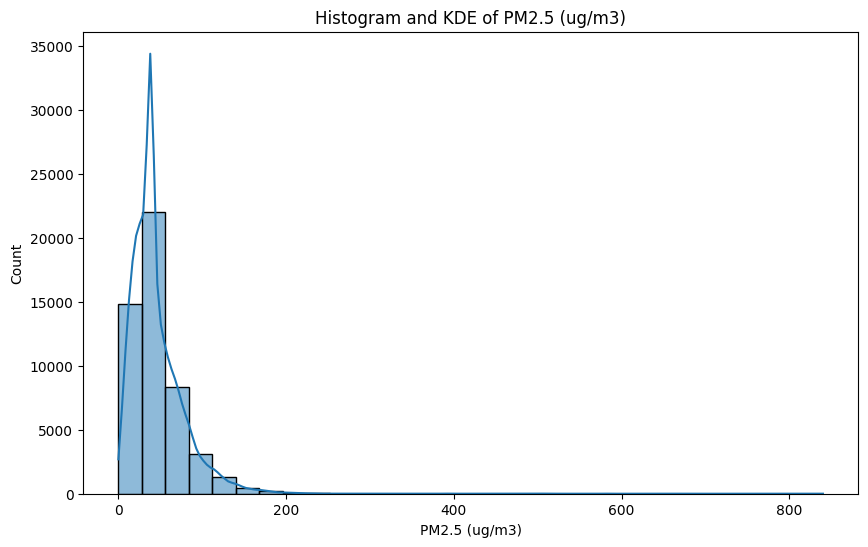

PM2.5 (ug/m3) - Skewness: 4.093223481007632
PM2.5 (ug/m3) - Kurtosis: 54.81461699664494


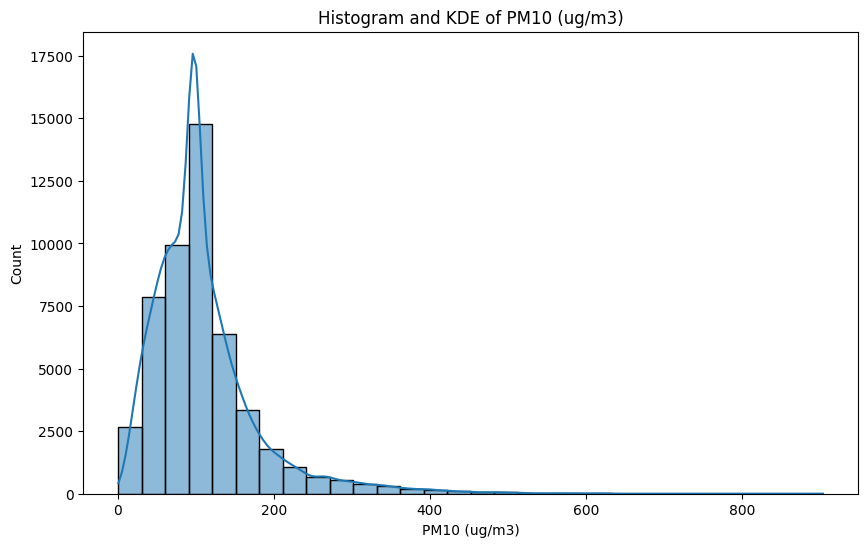

PM10 (ug/m3) - Skewness: 2.3240149800754484
PM10 (ug/m3) - Kurtosis: 9.669391304117443


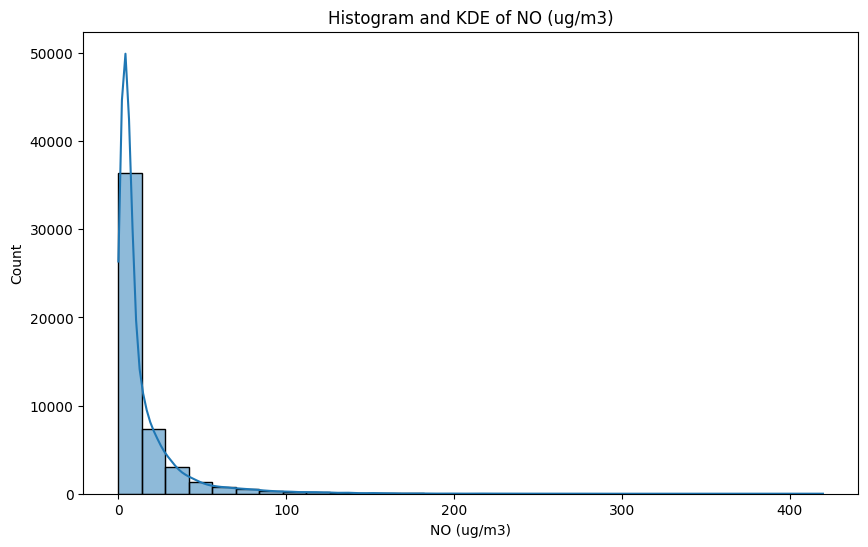

NO (ug/m3) - Skewness: 4.209004583506501
NO (ug/m3) - Kurtosis: 27.707695938754355


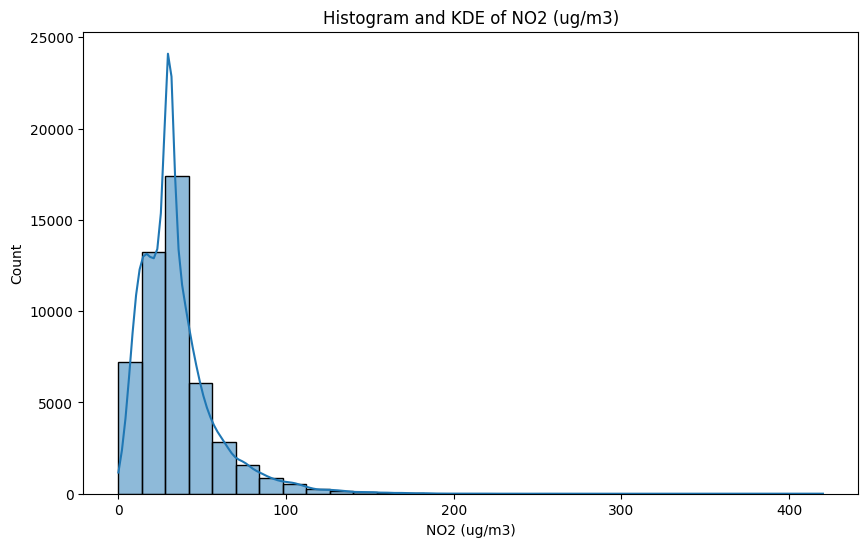

NO2 (ug/m3) - Skewness: 2.0691659820963078
NO2 (ug/m3) - Kurtosis: 8.377701529607839


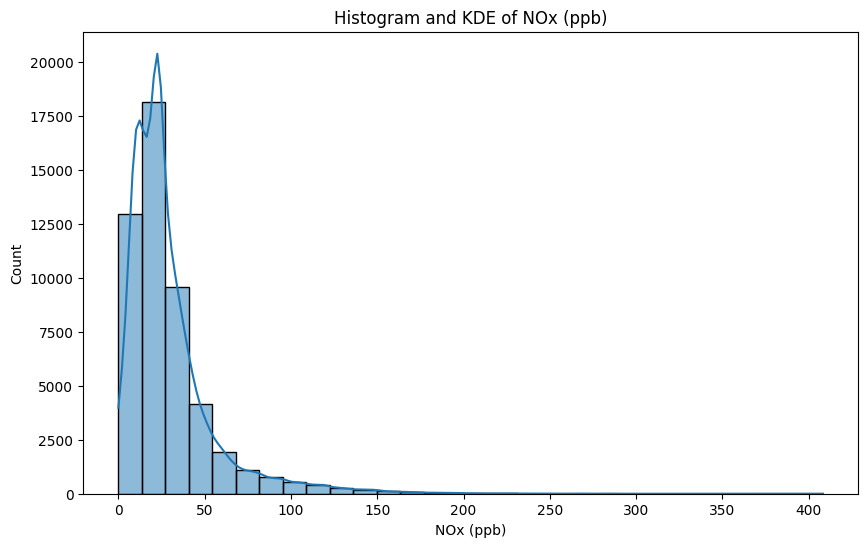

NOx (ppb) - Skewness: 2.716040357727738
NOx (ppb) - Kurtosis: 11.467874525918269


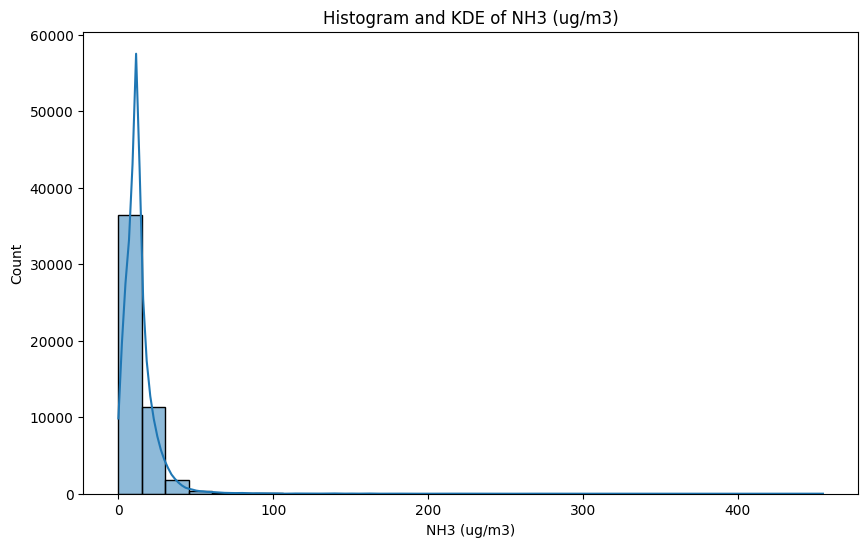

NH3 (ug/m3) - Skewness: 11.123977044014262
NH3 (ug/m3) - Kurtosis: 229.61613264288013


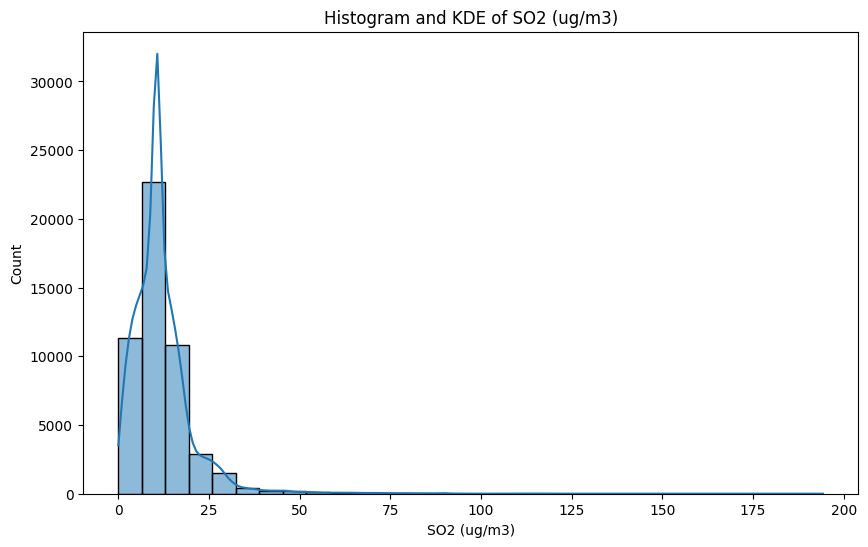

SO2 (ug/m3) - Skewness: 5.040298688918599
SO2 (ug/m3) - Kurtosis: 52.80836659469572


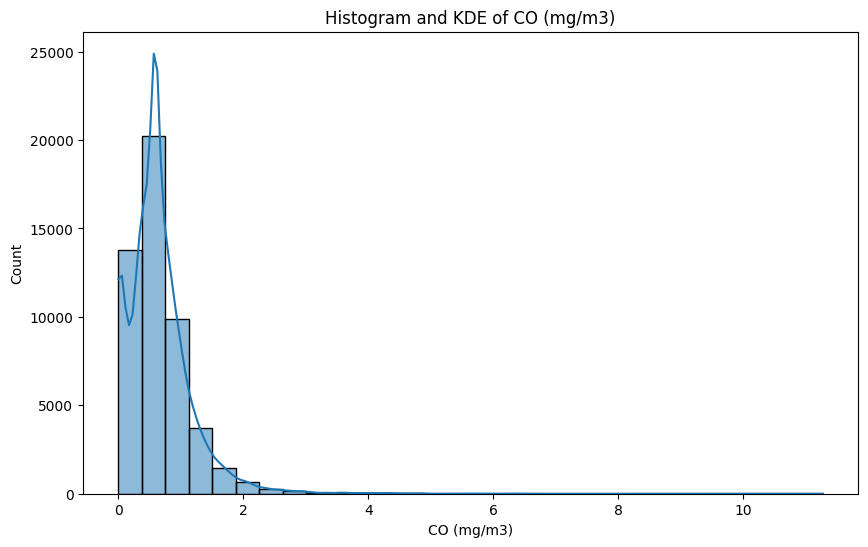

CO (mg/m3) - Skewness: 3.218948476428425
CO (mg/m3) - Kurtosis: 31.064131070599814


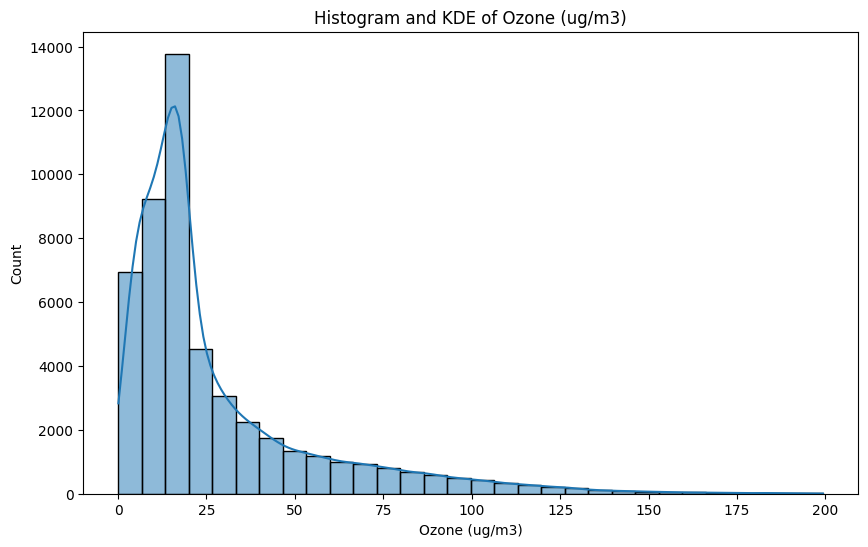

Ozone (ug/m3) - Skewness: 2.0574475470871145
Ozone (ug/m3) - Kurtosis: 4.606777448812027


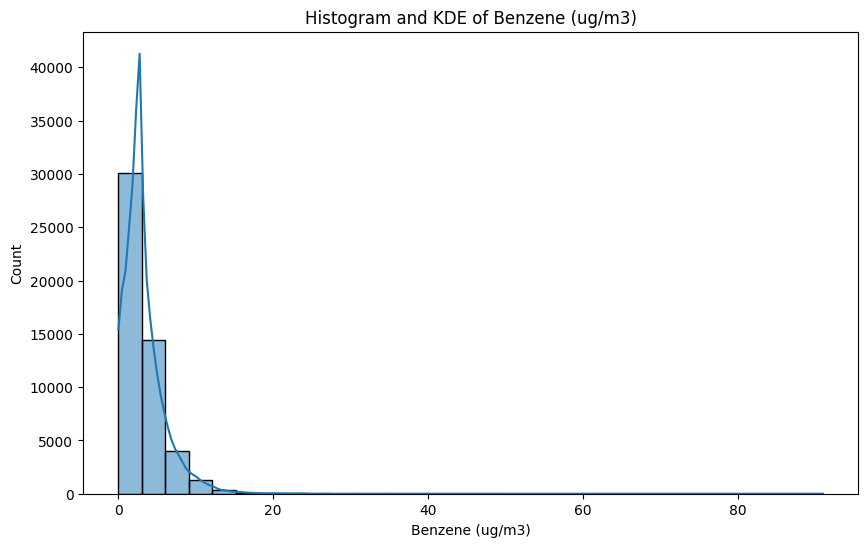

Benzene (ug/m3) - Skewness: 5.2504214525210315
Benzene (ug/m3) - Kurtosis: 104.93733463794118


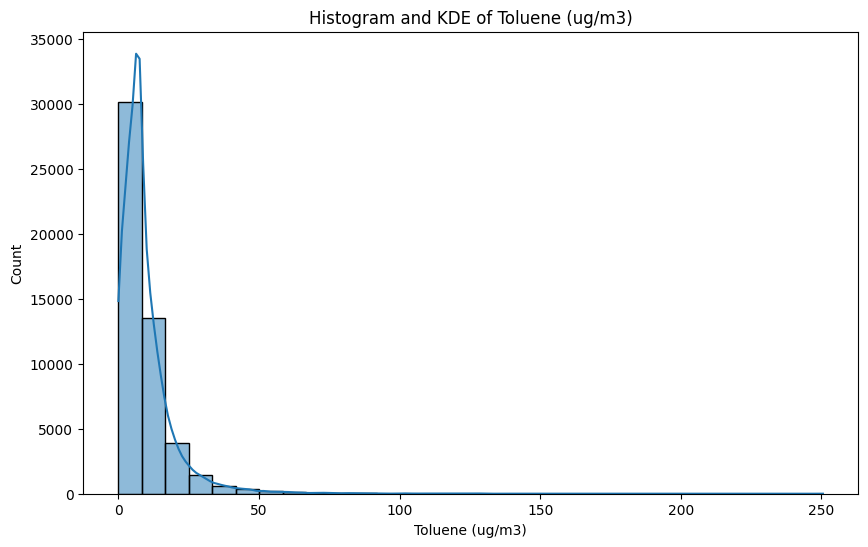

Toluene (ug/m3) - Skewness: 5.55009568084497
Toluene (ug/m3) - Kurtosis: 64.2035185626746


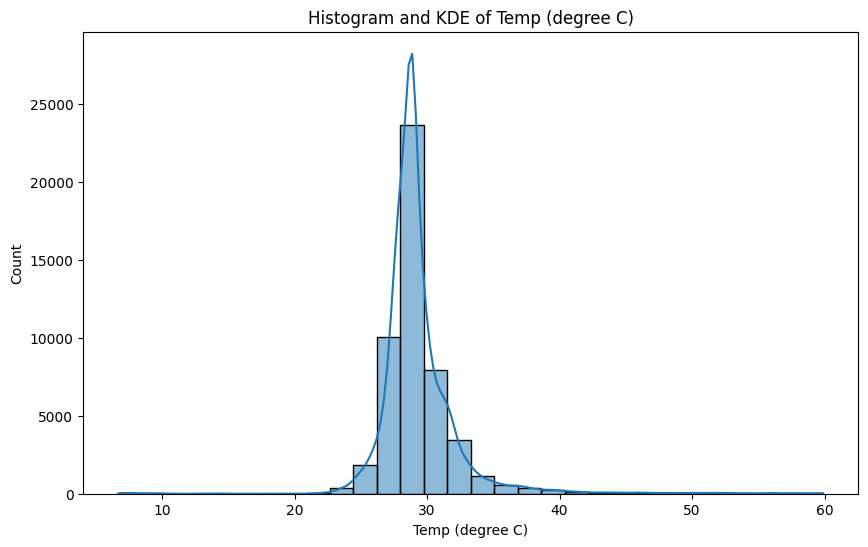

Temp (degree C) - Skewness: 3.0228853397954074
Temp (degree C) - Kurtosis: 24.667521823243327


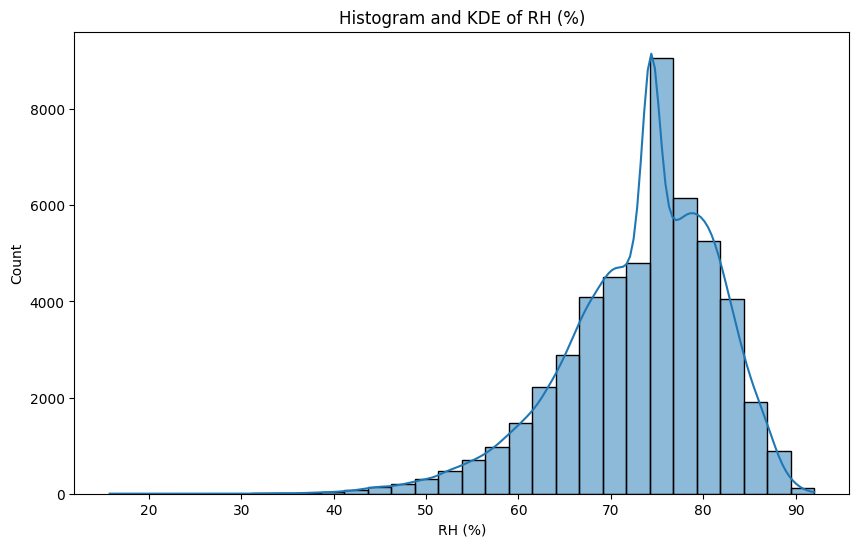

RH (%) - Skewness: -0.8295584319795841
RH (%) - Kurtosis: 1.0892722101527608


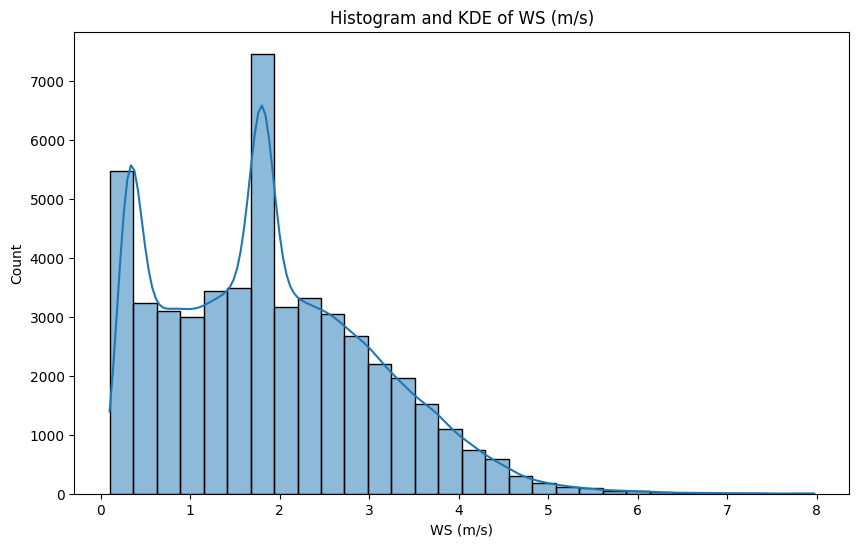

WS (m/s) - Skewness: 0.5983889084355555
WS (m/s) - Kurtosis: 0.11379843690402369


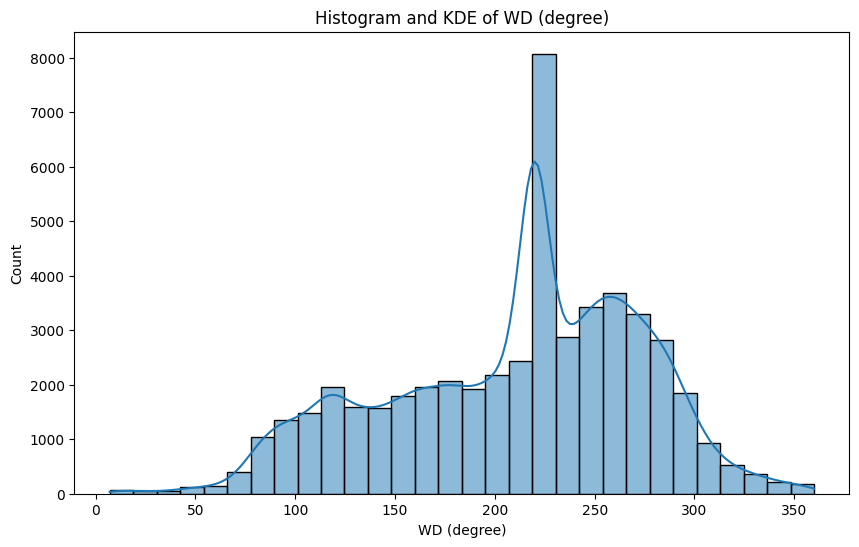

WD (degree) - Skewness: -0.42682819165654057
WD (degree) - Kurtosis: -0.4454888511843458


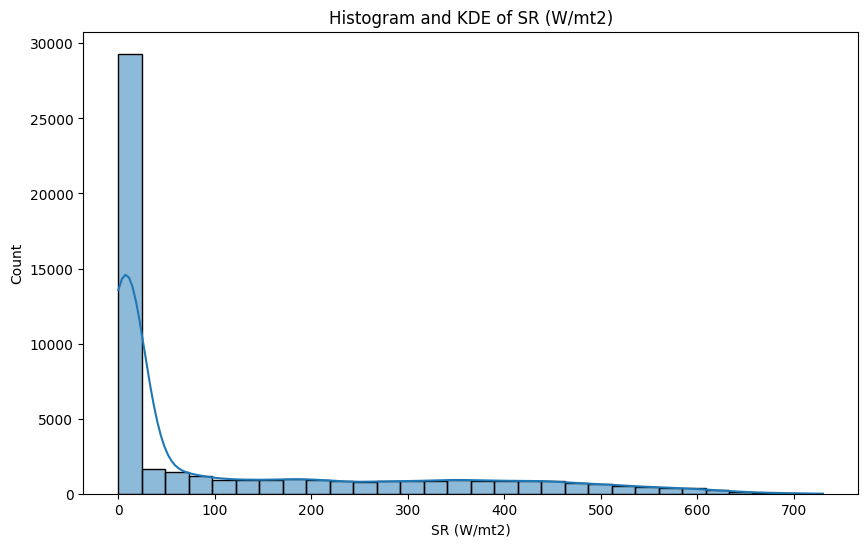

SR (W/mt2) - Skewness: 1.3683895450495263
SR (W/mt2) - Kurtosis: 0.5827451529149656


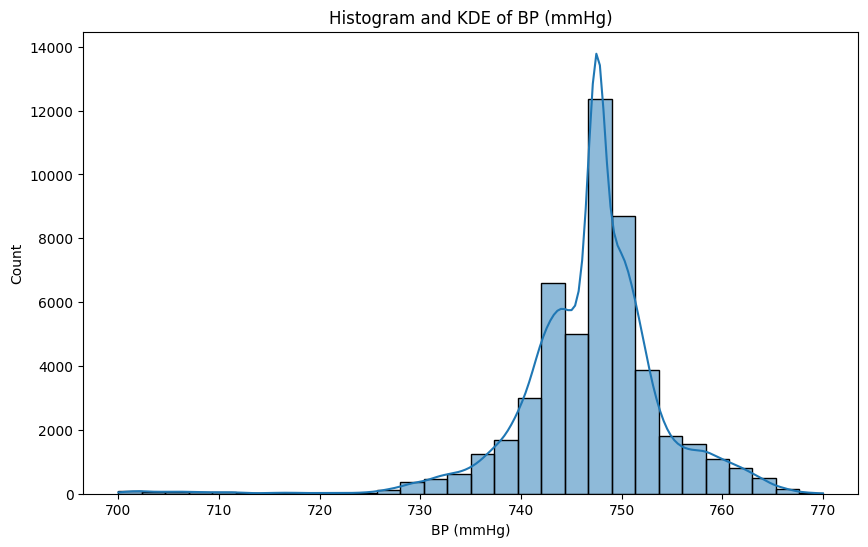

BP (mmHg) - Skewness: -1.3645617319745065
BP (mmHg) - Kurtosis: 7.565742104949946


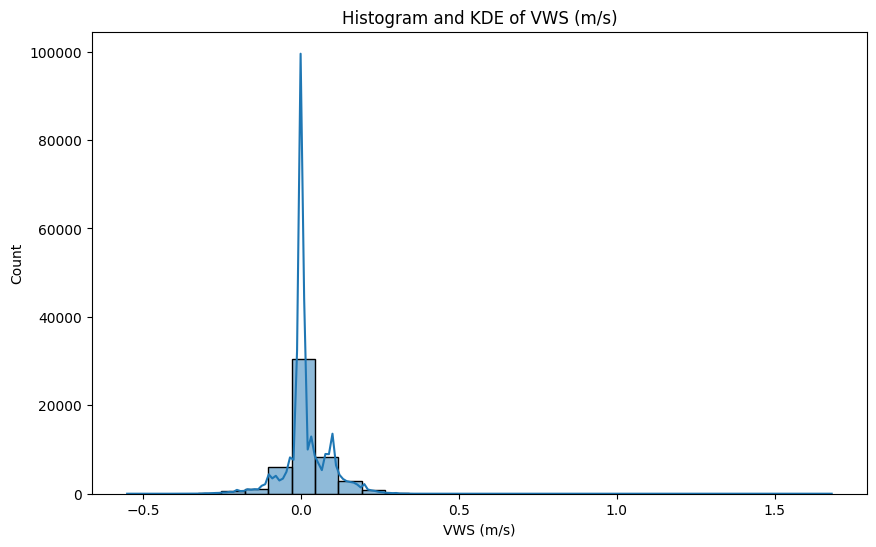

VWS (m/s) - Skewness: 0.42400917282772277
VWS (m/s) - Kurtosis: 9.503992082783638


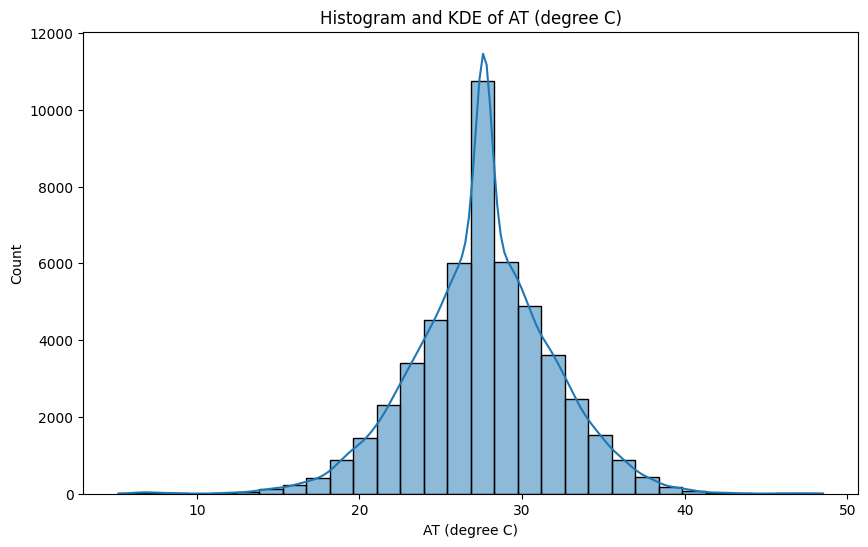

AT (degree C) - Skewness: -0.15958556032439994
AT (degree C) - Kurtosis: 1.0835605808338218


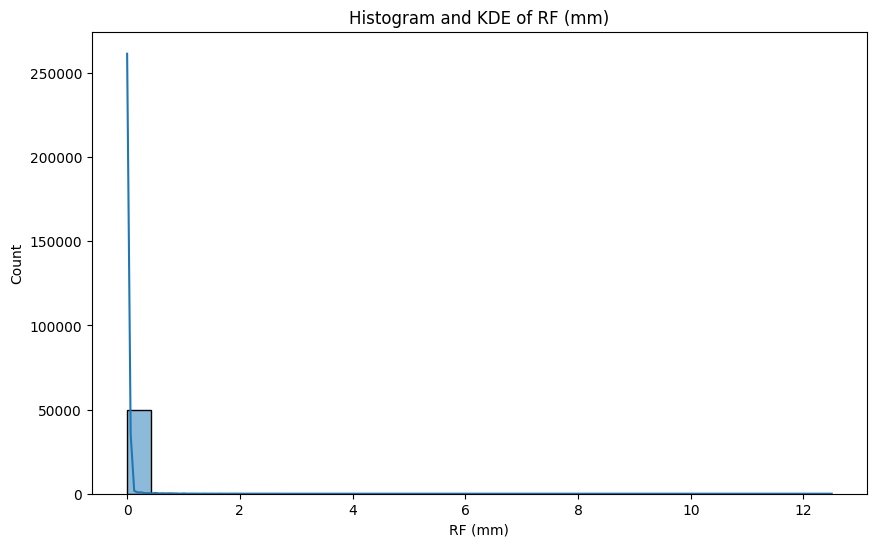

RF (mm) - Skewness: 23.1392314851174
RF (mm) - Kurtosis: 708.3104707309163


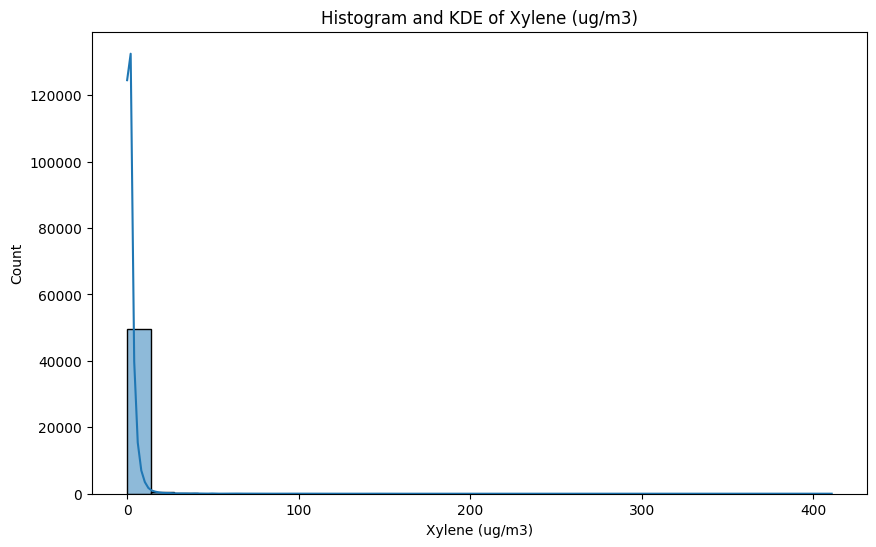

Xylene (ug/m3) - Skewness: 21.01928151304954
Xylene (ug/m3) - Kurtosis: 607.7788673895554


In [ ]:
def dist_plot(df, numerical_cols):
    for i in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[i], bins=30, kde=True)
        plt.title(f"Histogram and KDE of {i}")
        plt.show()
        print(f"{i} - Skewness: {df[i].skew()}")
        print(f"{i} - Kurtosis: {df[i].kurt()}")
dist_plot(df, df.select_dtypes(include=['float64', 'int64']).columns)


Skewness memberikan indikasi apakah data lebih banyak terkumpul di sisi kiri atau kanan distribusi.

Kurtosis mengindikasikan apakah distribusi memiliki outliers atau tidak, dan seberapa tajam puncaknya.

Kolom seperti PM2.5 dan SO2 memiliki distribusi yang positif skewed dengan kurtosis tinggi, yang menunjukkan adanya banyak nilai ekstrim.

Kolom AT (degree C) menunjukkan distribusi yang lebih normal, dengan skewness mendekati nol dan kurtosis mendekati tiga.

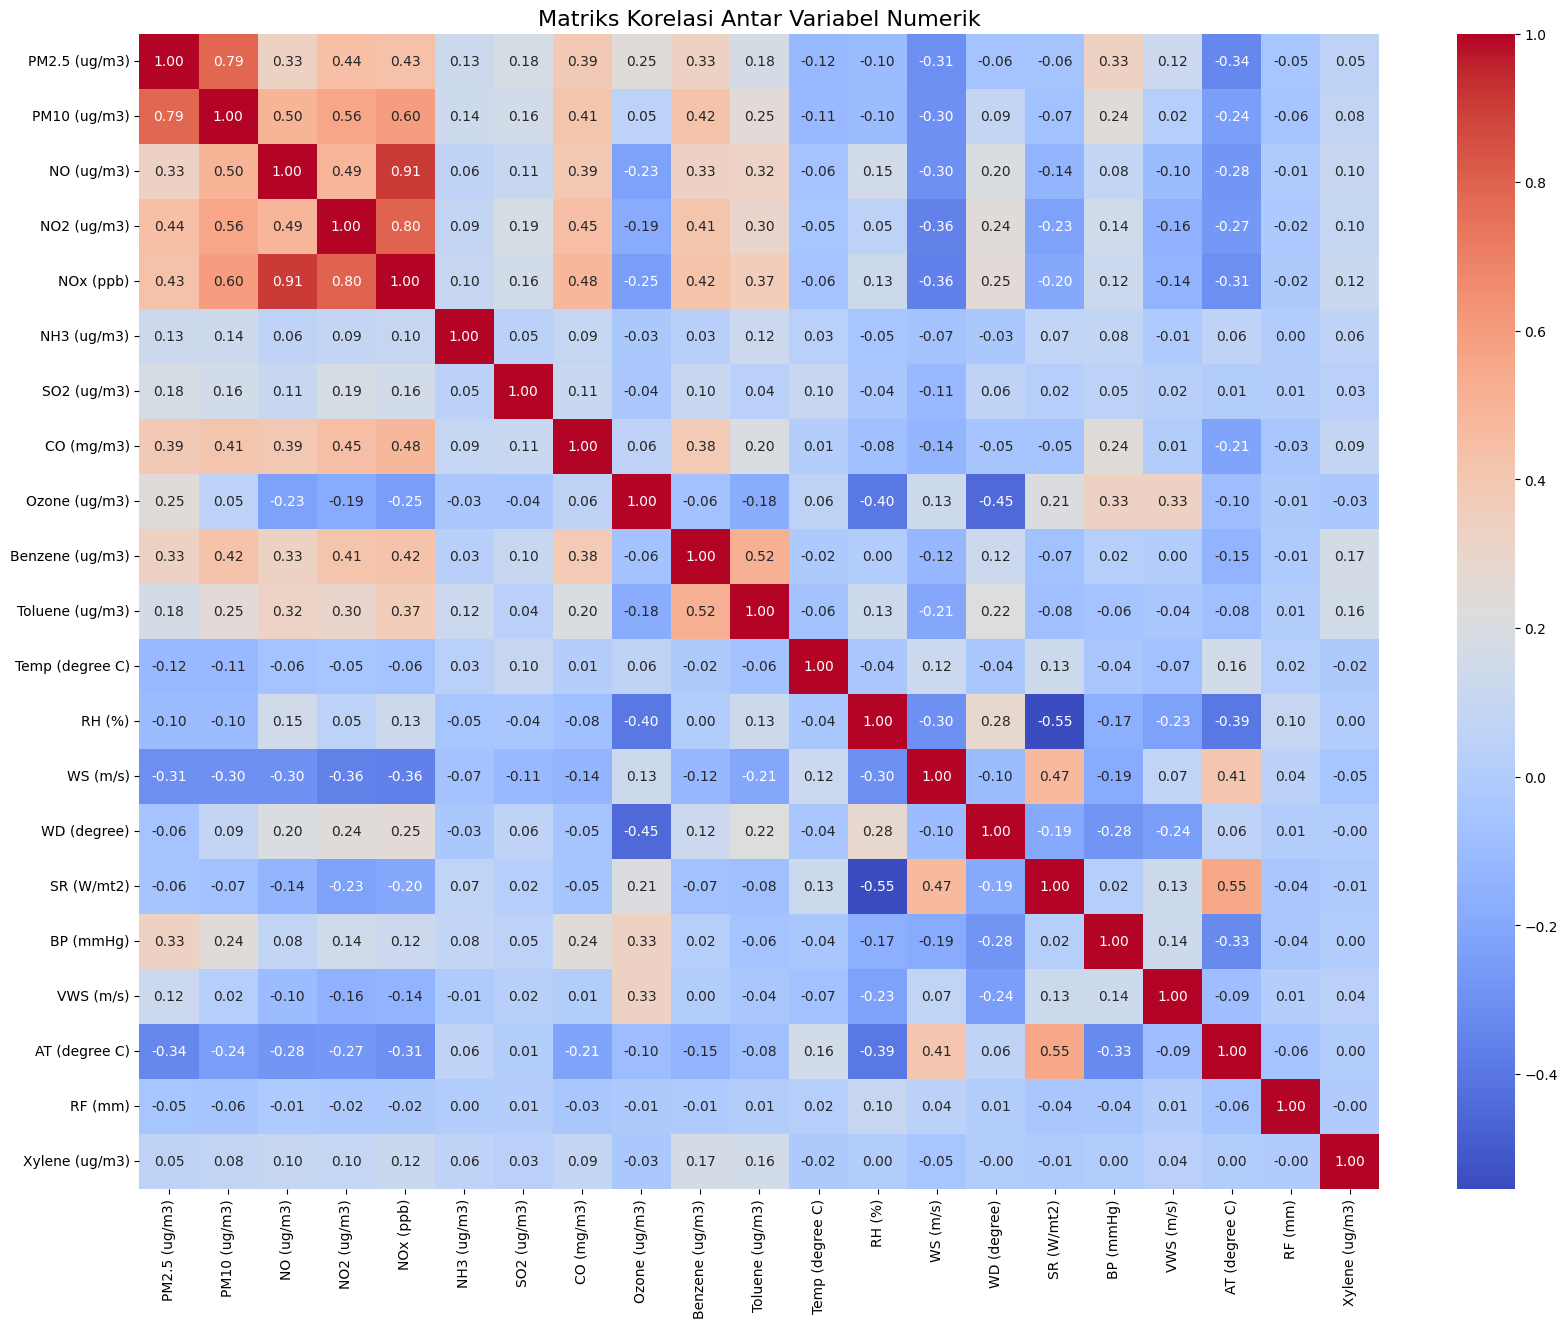

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()


Hubungan Positif:Beberapa variabel seperti PM2.5 dan PM10, serta NO dan NOx, memiliki korelasi tinggi yang menunjukkan bahwa mereka cenderung berfluktuasi secara bersamaan.

CO dan Ozone juga menunjukkan korelasi moderat, yang menunjukkan hubungan antara polusi udara dan ozon.

Hubungan Negatif:AT (suhu) memiliki korelasi negatif dengan PM2.5 dan RH, yang bisa menunjukkan pola musiman atau lingkungan yang memengaruhi suhu dan kualitas udara.

Korelasi Lemah:Beberapa kolom seperti NO2 dan Benzene, serta PM10 dan Temp, menunjukkan korelasi yang sangat lemah, yang berarti faktor-faktor ini tidak berhubungan erat satu sama lain dalam dataset ini.

## Check Anomaly

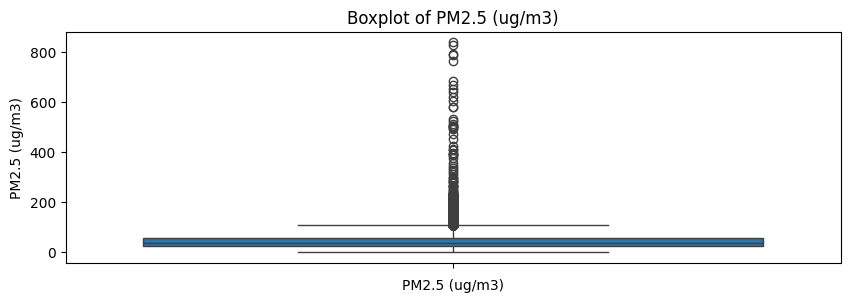

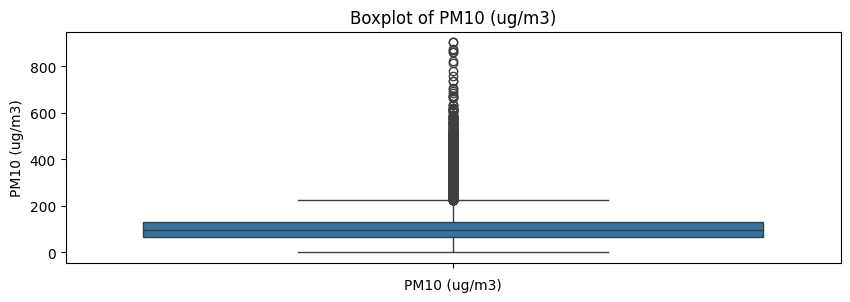

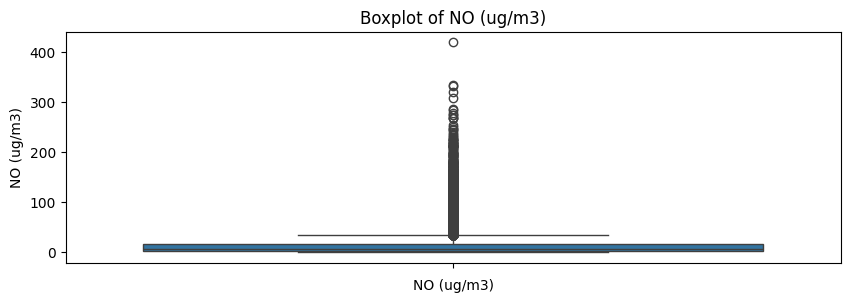

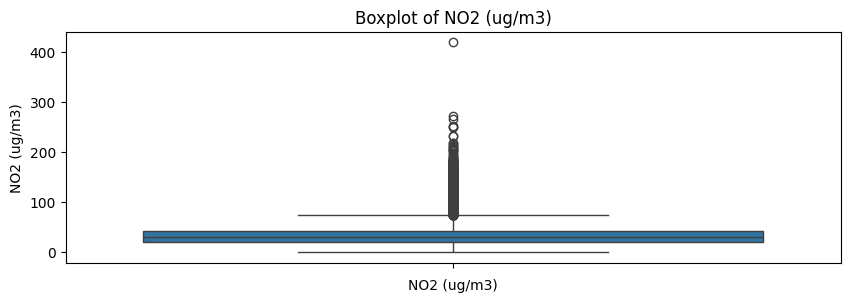

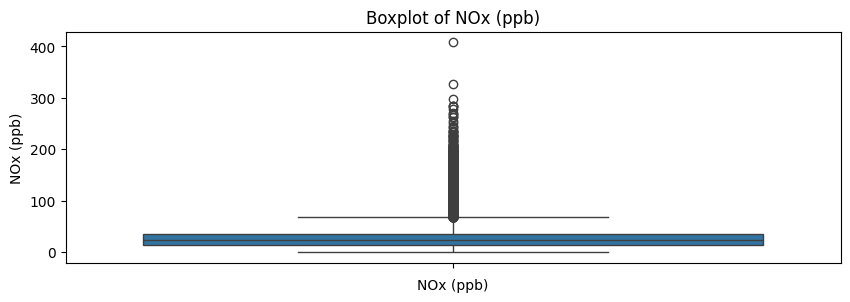

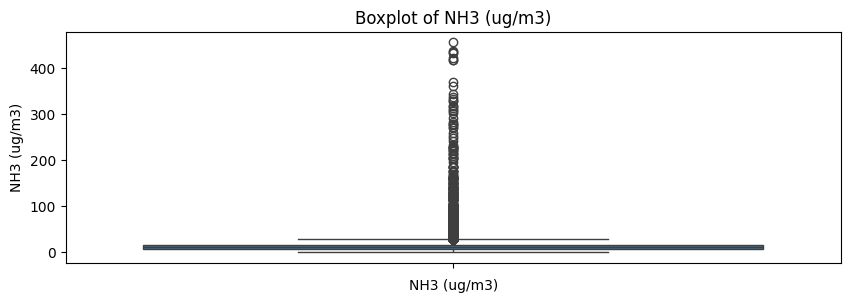

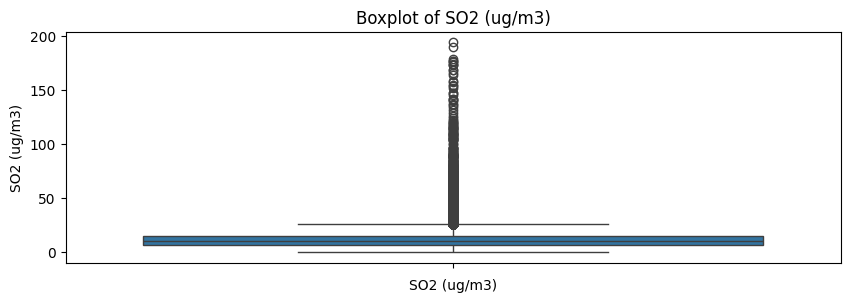

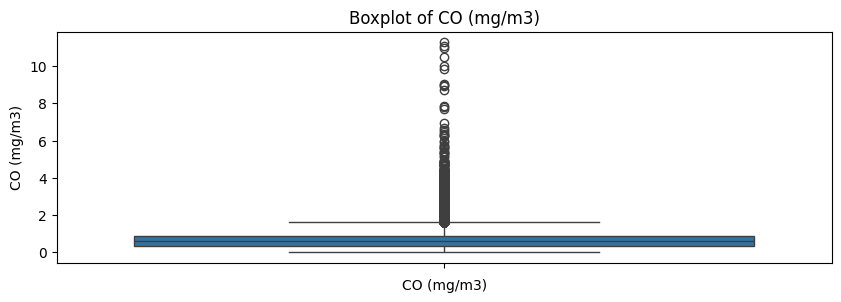

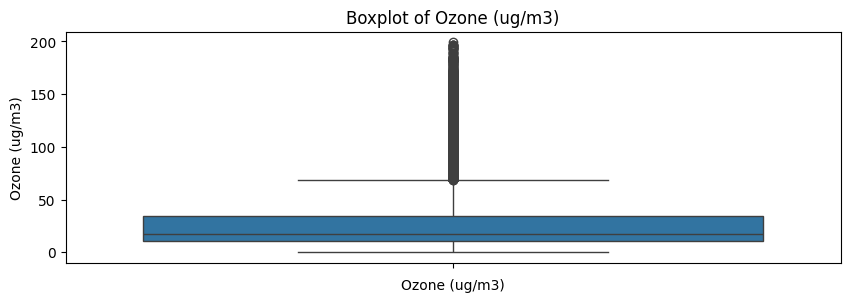

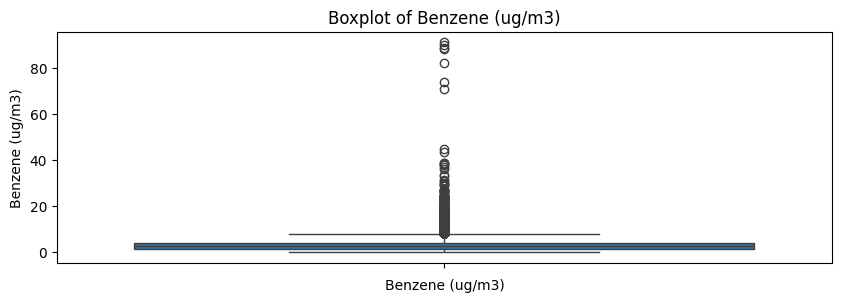

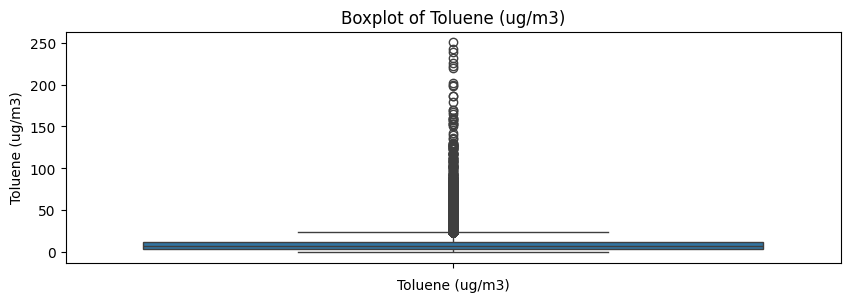

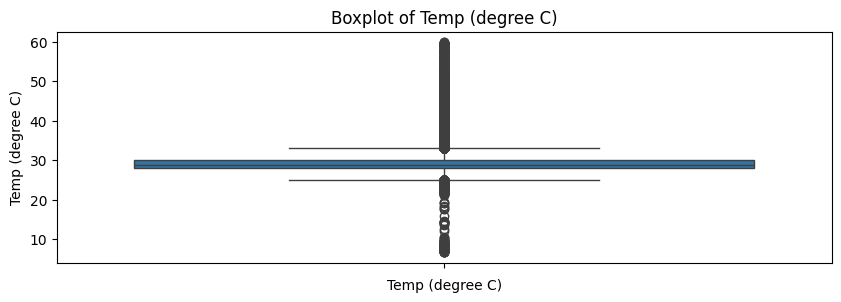

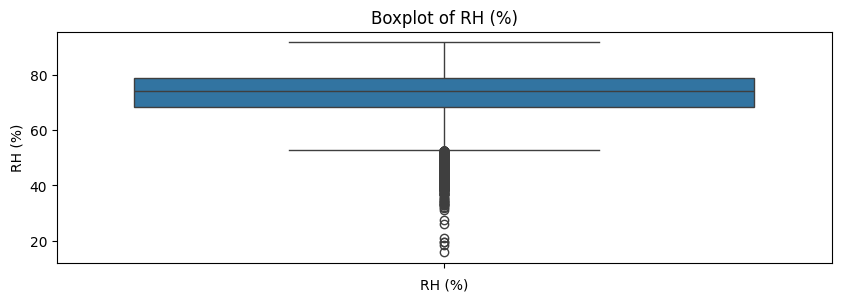

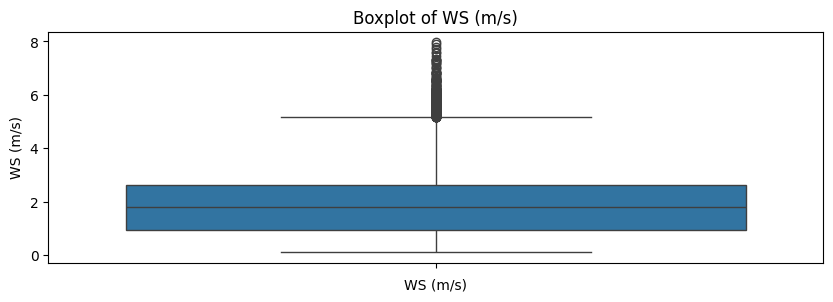

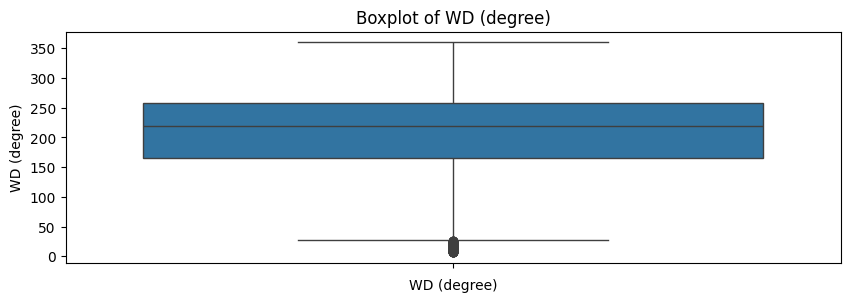

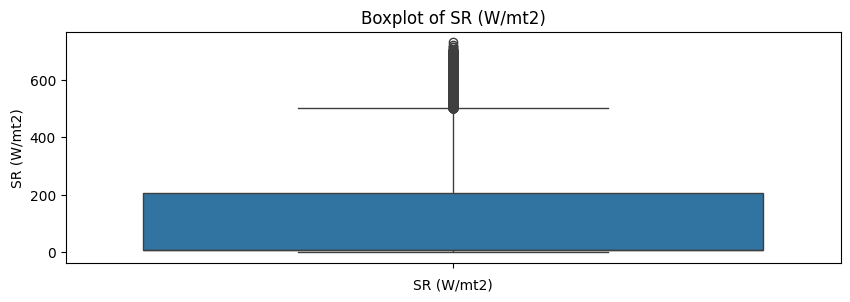

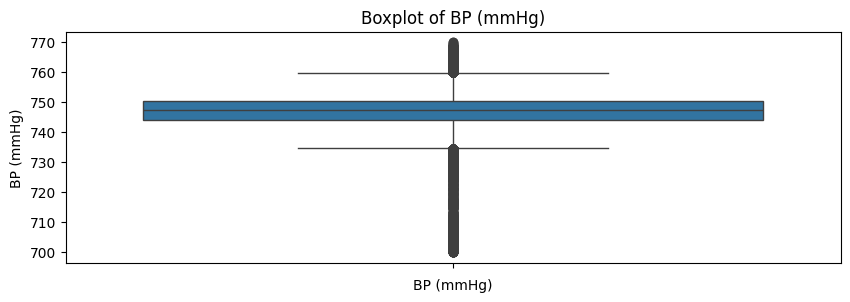

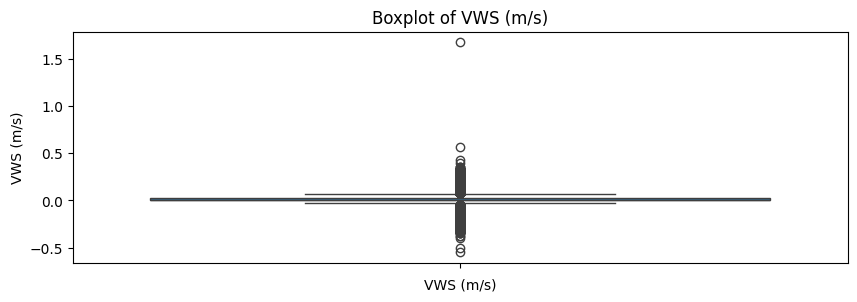

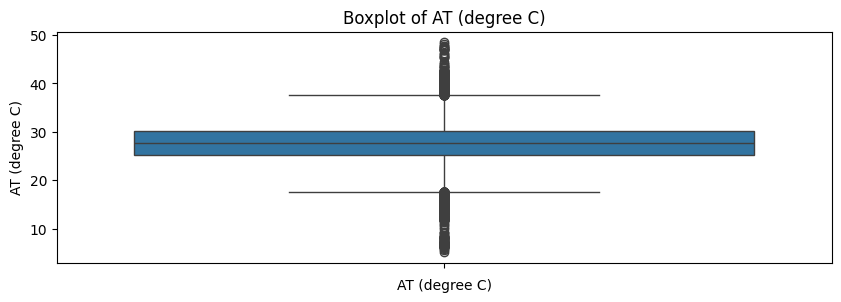

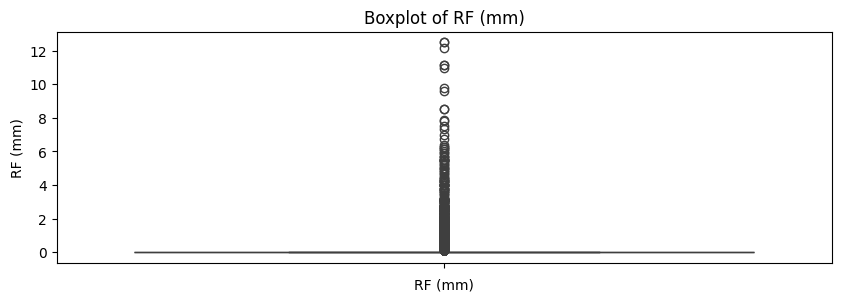

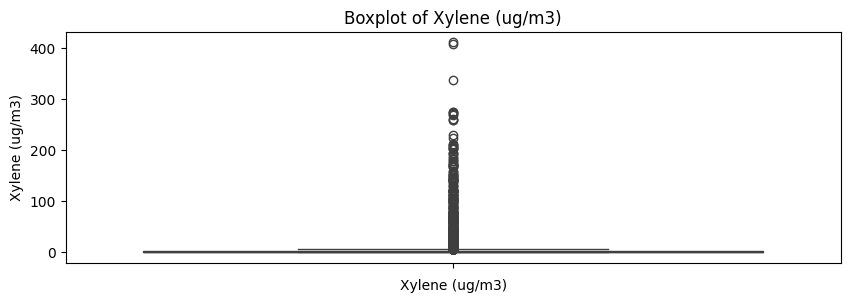

In [ ]:
def dist_plot(df, numerical_cols):
    for i in numerical_cols:
        plt.figure(figsize=(10,3))
        sns.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.xlabel(i)

        plt.show()
dist_plot(df, df.select_dtypes(include=['float64', 'int64']).columns)


Disini bisa kita liat bahwa setiap variable mostly memiliki outlier

In [ ]:
# Handling Outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

Menangani outliers (mengganti dengan batas yang telah ditentukan)

In [ ]:
df[numeric_columns].describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,...,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.0,50400.00000
mean,44.381187,105.147263,11.127846,33.067658,26.947042,12.515217,11.392123,0.633958,25.163294,3.104635,...,29.107095,73.358805,1.883681,210.334692,116.579566,747.210895,0.013202,27.614113,0.0,1.84063
std,26.358482,52.974968,10.749622,18.219678,18.061400,7.192770,6.249587,0.417838,20.378412,2.136852,...,1.821995,7.941851,1.138848,63.287595,164.497855,5.784717,0.037120,4.078145,0.0,1.63921
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,25.000000,52.750000,0.100000,26.750000,0.000000,734.505000,-0.045000,17.695000,0.0,0.00000
25%,25.330000,67.750000,3.100000,19.730000,13.330000,7.550000,7.080000,0.350000,10.620000,1.600000,...,28.000000,68.500000,0.950000,165.500000,6.670000,744.000000,0.000000,25.150000,0.0,0.62000
50%,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,2.700000,...,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,27.650000,0.0,1.30000
75%,58.500000,131.500000,15.800000,41.930000,35.550000,15.970000,14.650000,0.860000,34.000000,4.200000,...,30.000000,79.000000,2.630000,258.000000,204.500000,750.330000,0.030000,30.120000,0.0,2.60000
max,108.255000,227.125000,34.850000,75.230000,68.880000,28.600000,26.005000,1.625000,69.070000,8.100000,...,33.000000,92.000000,5.150000,360.000000,501.245000,759.825000,0.075000,37.575000,0.0,5.57000


Memeriksa distribusi data setelah penanganan outliers

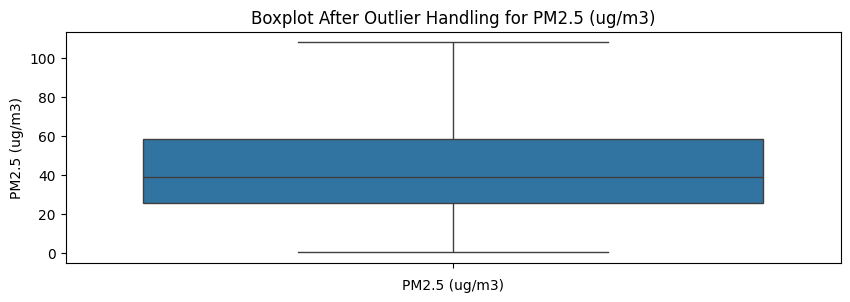

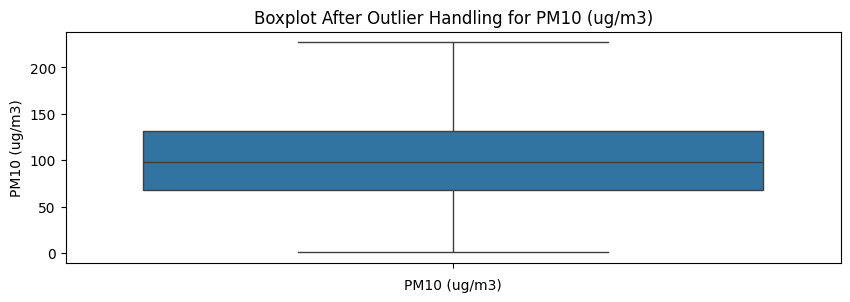

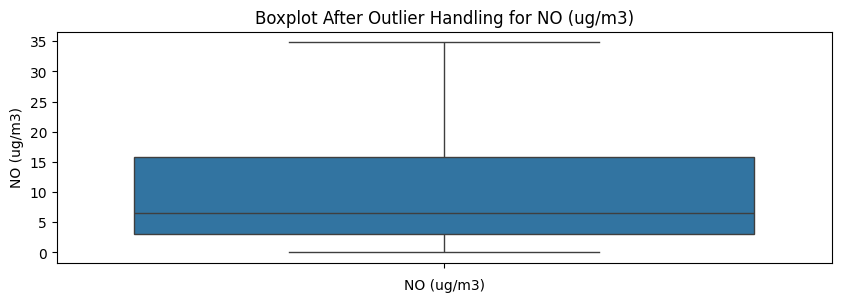

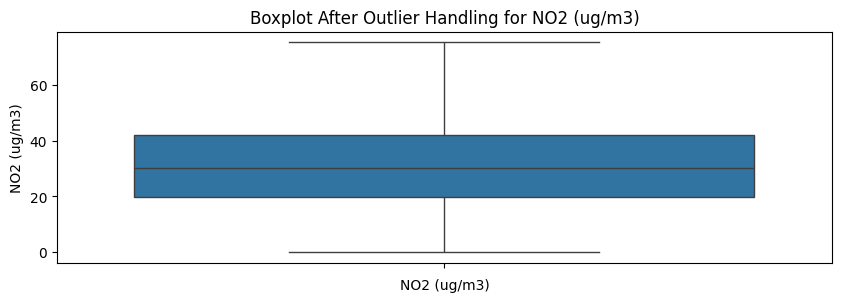

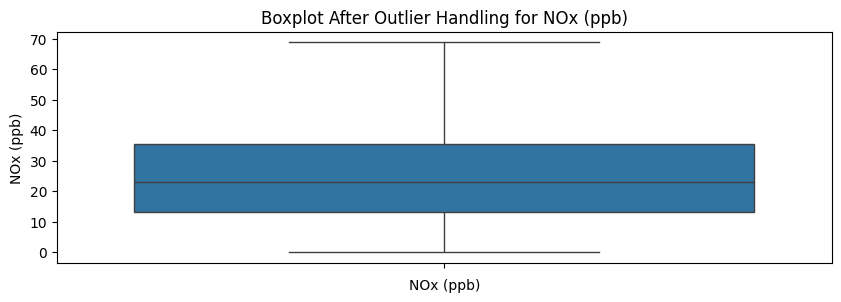

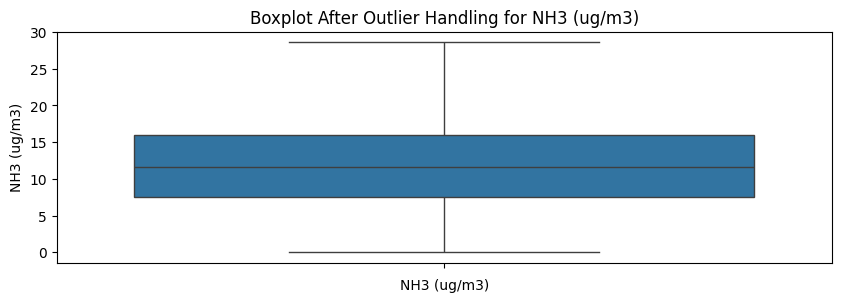

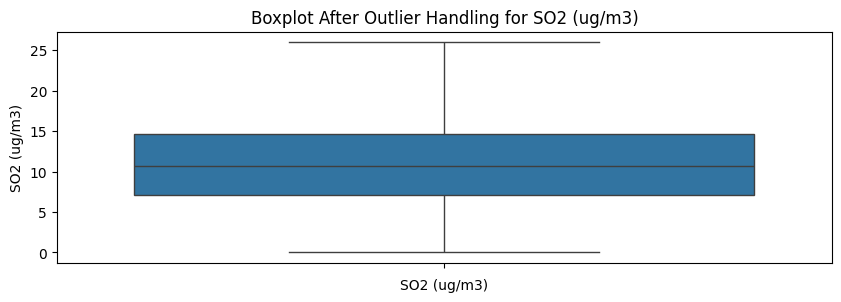

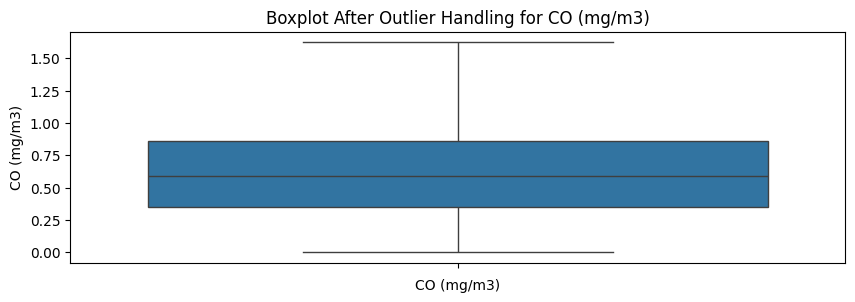

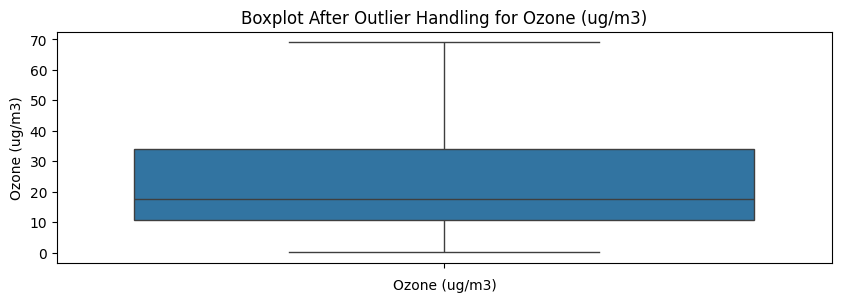

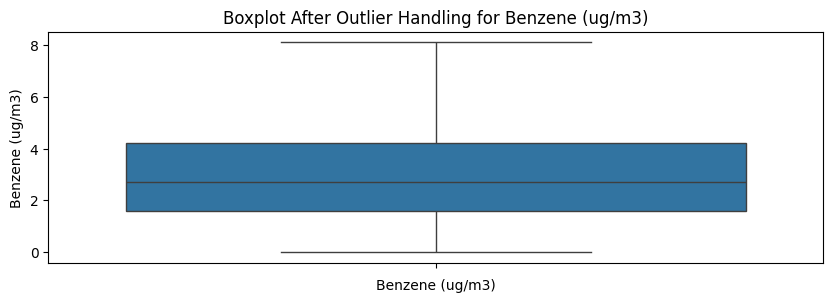

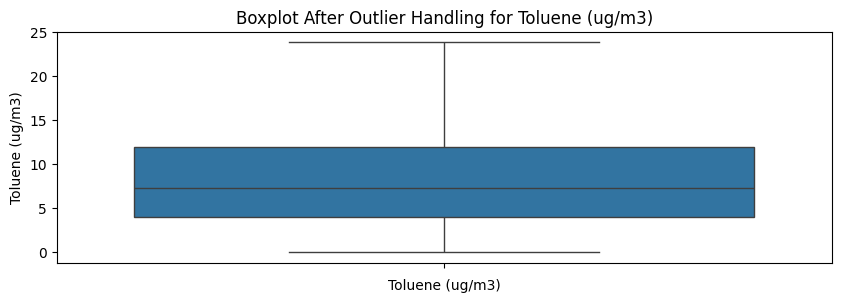

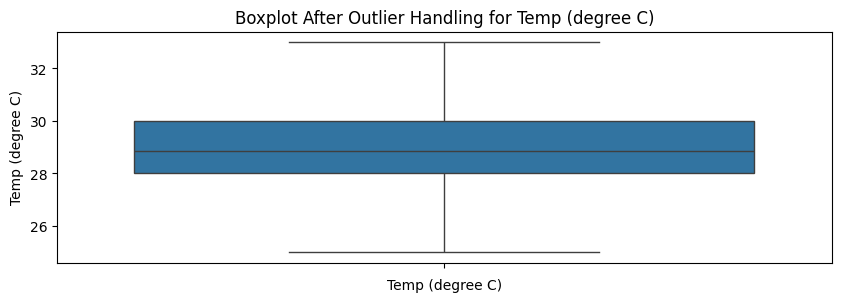

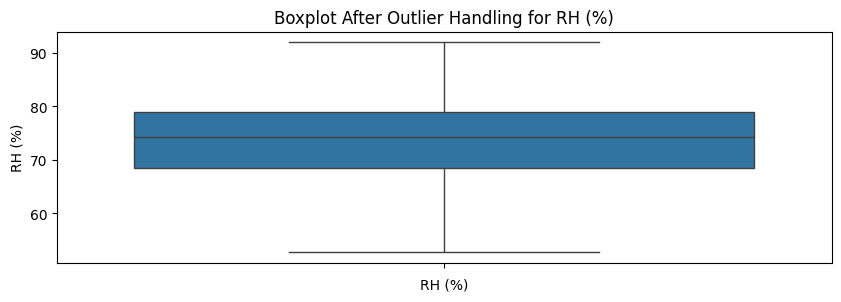

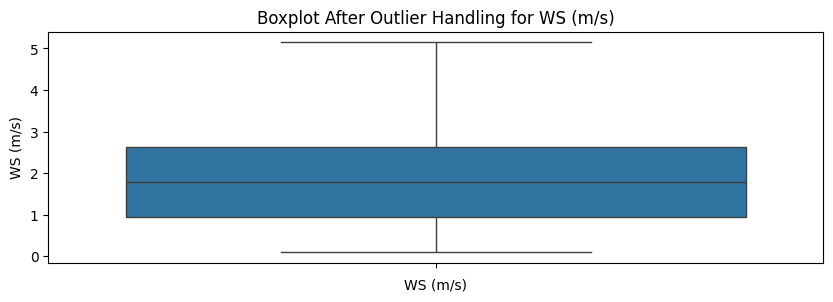

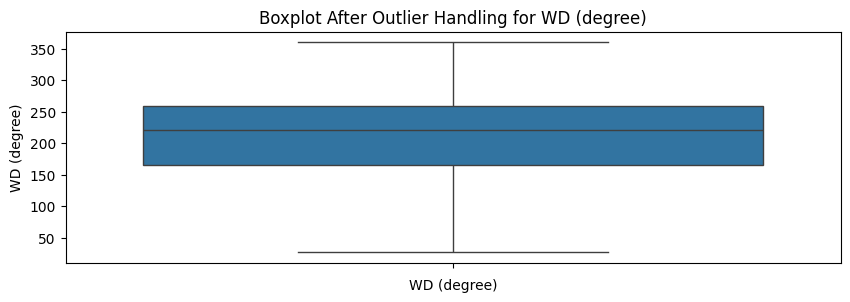

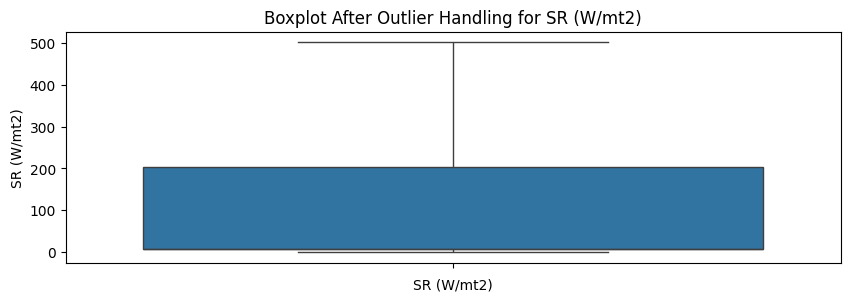

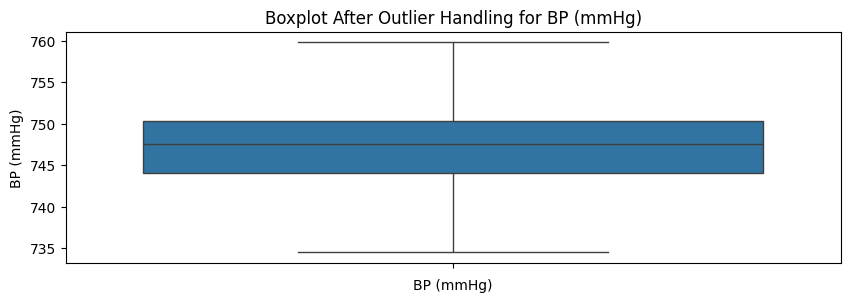

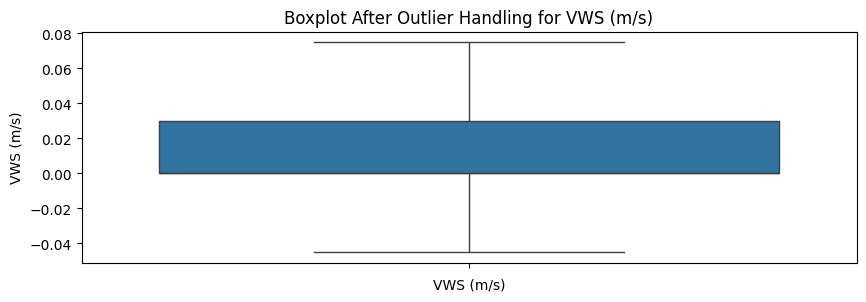

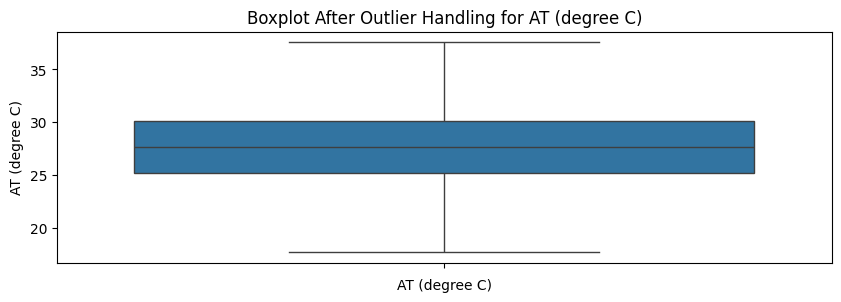

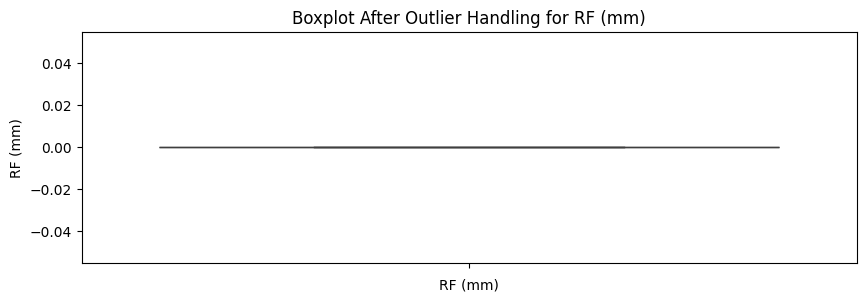

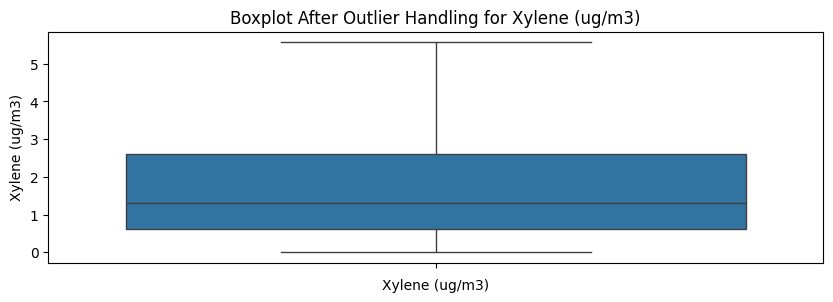

In [ ]:
def dist_plot_after_outlier_handling(df, numerical_cols):
    for i in numerical_cols:

        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[i] = np.where(df[i] < lower_bound, lower_bound,
                         np.where(df[i] > upper_bound, upper_bound, df[i]))


        plt.figure(figsize=(10, 3))
        sns.boxplot(df[i])
        plt.title(f"Boxplot After Outlier Handling for {i}")
        plt.xlabel(i)

        plt.show()


dist_plot_after_outlier_handling(df, df.select_dtypes(include=['float64', 'int64']).columns)


boxplot setiap kolom pun sekarang sudah tidak memiliki outlier

B. Untuk pemodelan, anda perlu untuk membagi data menjadi 80% training, 10%
validasi dan 10% testing, kemudian melakukan pre-processing data dengan mempersiapkan input-output yang
akan digunakan untuk memprediksi kondisi kualitas udara (AT) 1 jam kedepan menggunakan data di 5 jam
sebelumnya.

## Split data

In [ ]:
total_samples = len(df)
train_size = int(0.8 * total_samples)
val_size = int(0.1 * total_samples)

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size+val_size]
test_data = df.iloc[train_size+val_size:]

print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")

Training set: 40320 samples
Validation set: 5040 samples
Test set: 5040 samples


Bagi Data secara Kronologis (80-10-10)

In [ ]:
# Handle missing values separately for each set
def clean_data(df):
    # Drop columns with high percentage of missing values (>30%)
    df_clean = df.drop(columns=['NH3 (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)'])

    # Fill remaining missing values with forward fill (appropriate for time series)
    df_clean = df_clean.fillna(method='ffill')
    return df_clean

train_clean = clean_data(train_data)
val_clean = clean_data(val_data)
test_clean = clean_data(test_data)

/tmp/ipython-input-34-3140147146.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill')
/tmp/ipython-input-34-3140147146.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill')


In [ ]:
# Select relevant features based on EDA
selected_features = [
    'AT (degree C)',        # Target variable
    'Temp (degree C)',      # Highly correlated with AT
    'RH (%)',               # Strong negative correlation
    'SR (W/mt2)',           # Solar radiation
    'PM2.5 (ug/m3)',        # Air quality indicator
    'NO2 (ug/m3)',          # Air quality indicator
    'WS (m/s)',             # Wind speed
    'BP (mmHg)'             # Barometric pressure
]

train_model = train_clean[selected_features]
val_model = val_clean[selected_features]
test_model = test_clean[selected_features]

Pilih target (AT) dan fitur (gunakan semua kolom numerik kecuali tanggal)

## Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data (fit only on training data)
scaler = MinMaxScaler()
scaler.fit(train_model)

train_scaled = scaler.transform(train_model)
val_scaled = scaler.transform(val_model)
test_scaled = scaler.transform(test_model)

Disini saya menggunakan MinMaxScaler untuk menghandle outlier

In [ ]:
look_back = 5
n_features = len(selected_features)

Buat kumpulan window size geser menggunakan fungsi khusus dengan ukuran jendela = 5. Untuk setiap langkah waktu, serangkaian fitur digunakan sebagai masukan (X), dan nilai target pada langkah waktu berikutnya digunakan sebagai keluaran (y).

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import joblib
train_generator = TimeseriesGenerator(
    train_scaled,
    train_scaled[:, 0],  # Target is AT (first column)
    length=look_back,
    batch_size=32
)

val_generator = TimeseriesGenerator(
    val_scaled,
    val_scaled[:, 0],
    length=look_back,
    batch_size=32
)

test_generator = TimeseriesGenerator(
    test_scaled,
    test_scaled[:, 0],
    length=look_back,
    batch_size=32
)

In [ ]:
# Verify the shapes
X_train, y_train = train_generator[0]
print(f"Training target shape: {y_train.shape}")

Training input shape: (32, 5, 8)
Training target shape: (32,)


In [ ]:
joblib.dump(scaler, 'scaler.pkl')
np.save('train_scaled.npy', train_scaled)
np.save('val_scaled.npy', val_scaled)
np.save('test_scaled.npy', test_scaled)

## Build and Train Model LSTM

In [ ]:
hidden_size = 10
look_back = 5  # From data preparation
n_features = len(selected_features)  # From data preparation


model = Sequential([
    # LSTM layer with 10 units
    LSTM(hidden_size, input_shape=(look_back, n_features)),
    # Single dense layer with linear activation
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Menyusun model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 771 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

LSTM Layer 1: Menggunakan 10 units (hidden size) dengan return_sequences=True agar output dari setiap timestep dipertahankan untuk digunakan di layer berikutnya.

Dropout(0.3): Menonaktifkan 30% neuron pada setiap langkah pelatihan. Ini membantu mencegah overfitting.

LSTM Layer 2: Layer LSTM kedua dengan 10 units.

Dropout(0.3): Dropout layer setelah LSTM kedua untuk mencegah model terlalu bergantung pada satu neuron.

Dense(1): Layer output dengan 1 neuron untuk memprediksi AT (degree C)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Define callbacks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_lstm_model.h5', save_best_only=True)
]

In [ ]:
    # Train the model

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
1252/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mae: 0.0939

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0165 - mae: 0.0937 - val_loss: 0.0054 - val_mae: 0.0496
Epoch 2/100
1251/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mae: 0.0418

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0042 - mae: 0.0418 - val_loss: 0.0035 - val_mae: 0.0389
Epoch 3/100
1255/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mae: 0.0342

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0031 - mae: 0.0342 - val_loss: 0.0030 - val_mae: 0.0365
Epoch 4/100
1249/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mae: 0.0337

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0033 - mae: 0.0336 - val_loss: 0.0030 - val_mae: 0.0384
Epoch 5/100
1250/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0312

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0028 - mae: 0.0312 - val_loss: 0.0028 - val_mae: 0.0339
Epoch 6/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0028 - mae: 0.0305 - val_loss: 0.0029 - val_mae: 0.0347
Epoch 7/100
1257/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0295

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0025 - mae: 0.0295 - val_loss: 0.0028 - val_mae: 0.0338
Epoch 8/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0032 - mae: 0.0314 - val_loss: 0.0030 - val_mae: 0.0364
Epoch 9/100
1257/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mae: 0.0303

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0029 - mae: 0.0303 - val_loss: 0.0026 - val_mae: 0.0318
Epoch 10/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0027 - mae: 0.0290 - val_loss: 0.0027 - val_mae: 0.0335
Epoch 11/100
1259/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0302

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0030 - mae: 0.0302 - val_loss: 0.0025 - val_mae: 0.0312
Epoch 12/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0029 - mae: 0.0295 - val_loss: 0.0025 - val_mae: 0.0319
Epoch 13/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0027 - mae: 0.0290 - val_loss: 0.0025 - val_mae: 0.0313
Epoch 14/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0030 - mae: 0.0292 - val_loss: 0.0026 - val_mae: 0.0311
Epoch 15/100
1259/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mae: 0.0282

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0025 - mae: 0.0282 - val_loss: 0.0025 - val_mae: 0.0323
Epoch 16/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0024 - mae: 0.0278 - val_loss: 0.0028 - val_mae: 0.0336
Epoch 17/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0284

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0027 - mae: 0.0284 - val_loss: 0.0024 - val_mae: 0.0302
Epoch 18/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0023 - mae: 0.0277 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 19/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0024 - mae: 0.0280 - val_loss: 0.0025 - val_mae: 0.0312
Epoch 20/100
1250/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0275

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0025 - mae: 0.0275 - val_loss: 0.0024 - val_mae: 0.0301
Epoch 21/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0026 - mae: 0.0280 - val_loss: 0.0024 - val_mae: 0.0315
Epoch 22/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0024 - mae: 0.0272 - val_loss: 0.0025 - val_mae: 0.0316
Epoch 23/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0022 - mae: 0.0269 - val_loss: 0.0026 - val_mae: 0.0326
Epoch 24/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0025 - mae: 0.0274 - val_loss: 0.0024 - val_mae: 0.0306
Epoch 25/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0024 - mae: 0.0276 - val_loss: 0.0024 - val_mae: 0.0303
Epoch 26/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0026 - mae: 0.0276 - val_loss: 0.0024 - val_mae: 0.0305
Epoch 27/100
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0022 - mae: 0.0266 - val_loss: 0.0026 - val_mae: 0.0331
Epoch 28/100
1260/1260 ━━━━━━━━━━━━

In [ ]:
# Evaluate the model
print("\nModel Evaluation")
train_loss, train_mae = model.evaluate(train_generator, verbose=0)
val_loss, val_mae = model.evaluate(val_generator, verbose=0)
test_loss, test_mae = model.evaluate(test_generator, verbose=0)

print(f"Training MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")


Model Evaluation


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training MAE: 0.0272
Validation MAE: 0.0301
Test MAE: 0.0298


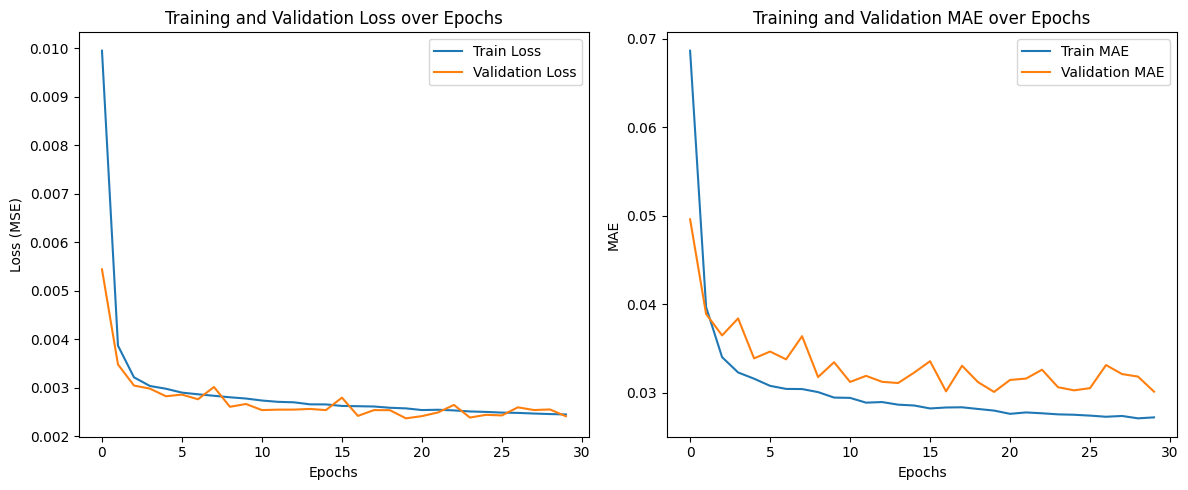

In [ ]:
# Visualisasi Loss dan MAE selama pelatihan
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


Grafik loss untuk pelatihan dan validasi menunjukkan penurunan yang signifikan pada beberapa epoch pertama, kemudian mencapai nilai stabil yang rendah, mengindikasikan bahwa model berhasil mempelajari pola data dengan baik tanpa terjebak dalam overfitting

Begitu pula, grafik MAE (Mean Absolute Error) untuk data pelatihan dan validasi menunjukkan konvergensi ke nilai yang rendah, dengan perbedaan yang sangat kecil di antara keduanya, yang mencerminkan kemampuan model untuk generalize dengan baik pada data yang belum pernah dilihat sebelumnya

## Prediction

In [ ]:
# Make predictions
def plot_predictions(generator, title):
    predictions = model.predict(generator)
    actuals = []
    for i in range(len(generator)):
        _, y = generator[i]
        actuals.extend(y)

    plt.figure(figsize=(12, 6))
    plt.plot(actuals, label='Actual')
    plt.plot(predictions, label='Predicted', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('AT (degree C)')
    plt.legend()
    plt.grid(True)
    plt.show()


================ PREDICTION VISUALIZATION ================
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


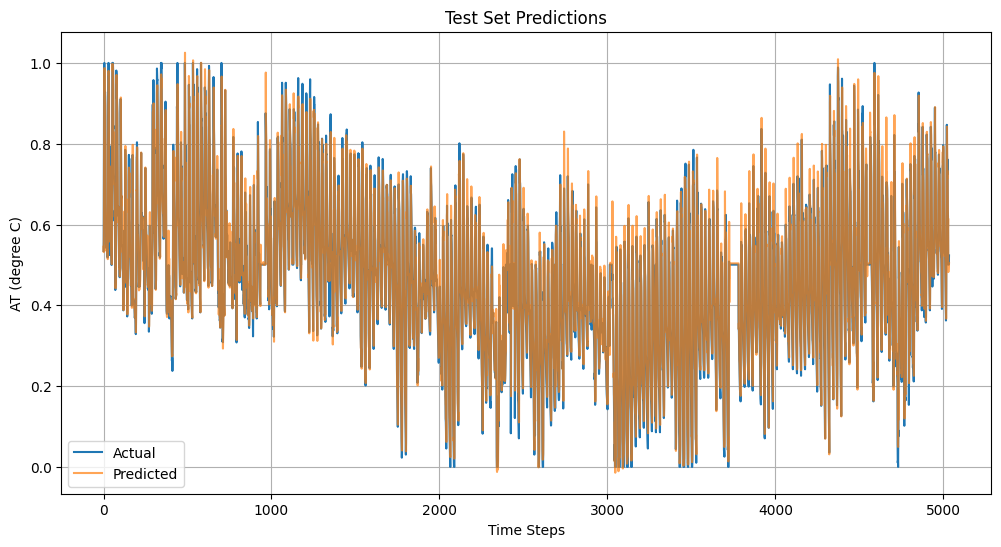

In [ ]:
print("\n================ PREDICTION VISUALIZATION ================")
plot_predictions(test_generator, "Test Set Predictions")

 Secara umum, model tampaknya dapat menangkap tren suhu udara dengan cukup baik, tetapi ada beberapa fluktuasi yang model belum sepenuhnya prediksi dengan akurat, terutama pada periode transisi suhu yang cepat.

Celah antara Prediksi dan Nilai Asli: Meski model menunjukkan kinerja yang baik, ada beberapa perbedaan kecil antara nilai asli dan prediksi. Hal ini bisa menjadi area untuk peningkatan lebih lanjut (misalnya, dengan tuning model atau penambahan fitur tambahan).

D. Modifikasi model LSTM baseline (c), anda dapat mengubah arsitektur atau
melakukan hyperparameter tuning

## Modified LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
# Enhanced model parameters
hidden_size = 32
look_back = 5     # Same as baseline
n_features = len(selected_features)

In [ ]:
# Build an enhanced LSTM model
enhanced_model = Sequential([
    # First LSTM layer with more units and return sequences for stacked LSTM
    LSTM(hidden_size,
         input_shape=(look_back, n_features),
         return_sequences=True,
         kernel_regularizer=l2(0.01)),  # L2 regularization to prevent overfitting
    Dropout(0.2),  # Dropout for regularization

    # Second LSTM layer
    LSTM(hidden_size//2),  # Reduced units in second layer
    Dropout(0.2),

    # Dense layer with linear activation
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Hyperparamater Search

In [ ]:
# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
enhanced_model.compile(optimizer=optimizer,
                      loss='mse',
                      metrics=['mae', 'mse'])

In [ ]:
# Enhanced callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_enhanced_lstm_model.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
]

In [ ]:
# Train the enhanced model
history = enhanced_model.fit(
    train_generator,
    epochs=200,  # Increased epochs
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200
1254/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0759 - mae: 0.1385 - mse: 0.0345

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0757 - mae: 0.1384 - mse: 0.0344 - val_loss: 0.0136 - val_mae: 0.0685 - val_mse: 0.0102 - learning_rate: 0.0010
Epoch 2/200
1254/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - mae: 0.0809 - mse: 0.0115

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0143 - mae: 0.0809 - mse: 0.0115 - val_loss: 0.0088 - val_mae: 0.0596 - val_mse: 0.0069 - learning_rate: 0.0010
Epoch 3/200
1259/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0100 - mae: 0.0666 - mse: 0.0083

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0100 - mae: 0.0666 - mse: 0.0083 - val_loss: 0.0069 - val_mae: 0.0513 - val_mse: 0.0055 - learning_rate: 0.0010
Epoch 4/200
1257/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - mae: 0.0542 - mse: 0.0060

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0073 - mae: 0.0542 - mse: 0.0060 - val_loss: 0.0048 - val_mae: 0.0395 - val_mse: 0.0037 - learning_rate: 0.0010
Epoch 5/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0059 - mae: 0.0486 - mse: 0.0049 - val_loss: 0.0052 - val_mae: 0.0438 - val_mse: 0.0043 - learning_rate: 0.0010
Epoch 6/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0060 - mae: 0.0483 - mse: 0.0051 - val_loss: 0.0050 - val_mae: 0.0442 - val_mse: 0.0042 - learning_rate: 0.0010
Epoch 7/200
1253/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - mae: 0.0452 - mse: 0.0045

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0053 - mae: 0.0452 - mse: 0.0045 - val_loss: 0.0042 - val_mae: 0.0387 - val_mse: 0.0036 - learning_rate: 0.0010
Epoch 8/200
1257/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mae: 0.0465 - mse: 0.0047

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0054 - mae: 0.0465 - mse: 0.0047 - val_loss: 0.0041 - val_mae: 0.0411 - val_mse: 0.0035 - learning_rate: 0.0010
Epoch 9/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0059 - mae: 0.0473 - mse: 0.0052 - val_loss: 0.0050 - val_mae: 0.0449 - val_mse: 0.0044 - learning_rate: 0.0010
Epoch 10/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0053 - mae: 0.0449 - mse: 0.0047 - val_loss: 0.0043 - val_mae: 0.0384 - val_mse: 0.0037 - learning_rate: 0.0010
Epoch 11/200
1258/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - mae: 0.0446 - mse: 0.0045

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0050 - mae: 0.0446 - mse: 0.0045 - val_loss: 0.0039 - val_mae: 0.0370 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 12/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0052 - mae: 0.0448 - mse: 0.0046 - val_loss: 0.0041 - val_mae: 0.0406 - val_mse: 0.0035 - learning_rate: 0.0010
Epoch 13/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0048 - mae: 0.0428 - mse: 0.0042 - val_loss: 0.0043 - val_mae: 0.0387 - val_mse: 0.0037 - learning_rate: 0.0010
Epoch 14/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0048 - mae: 0.0435 - mse: 0.0042 - val_loss: 0.0042 - val_mae: 0.0398 - val_mse: 0.0037 - learning_rate: 0.0010
Epoch 15/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0048 - mae: 0.0435 - mse: 0.0043 - val_loss: 0.0040 - val_mae: 0.0396 - val_mse: 0.0034 - learning_rate: 0.0010
Epoch 16/200
1255/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mae: 0.0442 - mse: 0.0045

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0050 - mae: 0.0442 - mse: 0.0045 - val_loss: 0.0039 - val_mae: 0.0390 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 17/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0048 - mae: 0.0406 - mse: 0.0043 - val_loss: 0.0039 - val_mae: 0.0381 - val_mse: 0.0035 - learning_rate: 2.0000e-04
Epoch 18/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0044 - mae: 0.0397 - mse: 0.0040 - val_loss: 0.0040 - val_mae: 0.0383 - val_mse: 0.0036 - learning_rate: 2.0000e-04
Epoch 19/200
1254/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mae: 0.0413 - mse: 0.0044

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0048 - mae: 0.0413 - mse: 0.0044 - val_loss: 0.0038 - val_mae: 0.0369 - val_mse: 0.0034 - learning_rate: 2.0000e-04
Epoch 20/200
1256/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mae: 0.0395 - mse: 0.0039

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0042 - mae: 0.0395 - mse: 0.0039 - val_loss: 0.0038 - val_mae: 0.0374 - val_mse: 0.0034 - learning_rate: 2.0000e-04
Epoch 21/200
1256/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mae: 0.0397 - mse: 0.0040

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0043 - mae: 0.0397 - mse: 0.0040 - val_loss: 0.0036 - val_mae: 0.0368 - val_mse: 0.0033 - learning_rate: 2.0000e-04
Epoch 22/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0043 - mae: 0.0396 - mse: 0.0040 - val_loss: 0.0037 - val_mae: 0.0373 - val_mse: 0.0033 - learning_rate: 2.0000e-04
Epoch 23/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0042 - mae: 0.0393 - mse: 0.0039 - val_loss: 0.0037 - val_mae: 0.0386 - val_mse: 0.0034 - learning_rate: 2.0000e-04
Epoch 24/200
1259/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mae: 0.0398 - mse: 0.0040

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0043 - mae: 0.0398 - mse: 0.0040 - val_loss: 0.0036 - val_mae: 0.0381 - val_mse: 0.0033 - learning_rate: 2.0000e-04
Epoch 25/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0044 - mae: 0.0403 - mse: 0.0041 - val_loss: 0.0036 - val_mae: 0.0368 - val_mse: 0.0033 - learning_rate: 2.0000e-04
Epoch 26/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0043 - mae: 0.0403 - mse: 0.0040 - val_loss: 0.0041 - val_mae: 0.0408 - val_mse: 0.0039 - learning_rate: 2.0000e-04
Epoch 27/200
1255/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - mae: 0.0400 - mse: 0.0043

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0046 - mae: 0.0400 - mse: 0.0043 - val_loss: 0.0035 - val_mae: 0.0366 - val_mse: 0.0033 - learning_rate: 4.0000e-05
Epoch 28/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0039 - mae: 0.0380 - mse: 0.0036 - val_loss: 0.0037 - val_mae: 0.0379 - val_mse: 0.0034 - learning_rate: 4.0000e-05
Epoch 29/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0041 - mae: 0.0389 - mse: 0.0038 - val_loss: 0.0035 - val_mae: 0.0370 - val_mse: 0.0033 - learning_rate: 4.0000e-05
Epoch 30/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0041 - mae: 0.0384 - mse: 0.0038 - val_loss: 0.0036 - val_mae: 0.0370 - val_mse: 0.0033 - learning_rate: 4.0000e-05
Epoch 31/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - mae: 0.0386 - mse: 0.0038

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0040 - mae: 0.0386 - mse: 0.0038 - val_loss: 0.0035 - val_mae: 0.0369 - val_mse: 0.0032 - learning_rate: 4.0000e-05
Epoch 32/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0043 - mae: 0.0390 - mse: 0.0040 - val_loss: 0.0036 - val_mae: 0.0372 - val_mse: 0.0034 - learning_rate: 4.0000e-05
Epoch 33/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0042 - mae: 0.0390 - mse: 0.0039 - val_loss: 0.0035 - val_mae: 0.0367 - val_mse: 0.0033 - learning_rate: 4.0000e-05
Epoch 34/200
1259/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045 - mae: 0.0401 - mse: 0.0043

1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0045 - mae: 0.0401 - mse: 0.0043 - val_loss: 0.0035 - val_mae: 0.0362 - val_mse: 0.0032 - learning_rate: 4.0000e-05
Epoch 35/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0043 - mae: 0.0390 - mse: 0.0040 - val_loss: 0.0036 - val_mae: 0.0370 - val_mse: 0.0034 - learning_rate: 4.0000e-05
Epoch 36/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0044 - mae: 0.0396 - mse: 0.0041 - val_loss: 0.0036 - val_mae: 0.0370 - val_mse: 0.0033 - learning_rate: 4.0000e-05
Epoch 37/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0042 - mae: 0.0390 - mse: 0.0039 - val_loss: 0.0036 - val_mae: 0.0369 - val_mse: 0.0033 - learning_rate: 1.0000e-05
Epoch 38/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0045 - mae: 0.0395 - mse: 0.0042 - val_loss: 0.0035 - val_mae: 0.0368 - val_mse: 0.0033 - learning_rate: 1.0000e-05
Epoch 39/200
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0041 - mae: 0.0381 - mse:

In [ ]:
# Evaluate the enhanced model
print("\n================ ENHANCED MODEL EVALUATION ================")
train_loss, train_mae, train_mse = enhanced_model.evaluate(train_generator, verbose=0)
val_loss, val_mae, val_mse = enhanced_model.evaluate(val_generator, verbose=0)
test_loss, test_mae, test_mse = enhanced_model.evaluate(test_generator, verbose=0)

print(f"Training MAE: {train_mae:.4f} (Baseline: {model.evaluate(train_generator, verbose=0)[1]:.4f})")
print(f"Validation MAE: {val_mae:.4f} (Baseline: {model.evaluate(val_generator, verbose=0)[1]:.4f})")
print(f"Test MAE: {test_mae:.4f} (Baseline: {model.evaluate(test_generator, verbose=0)[1]:.4f})")



================ ENHANCED MODEL EVALUATION ================
Training MAE: 0.0320 (Baseline: 0.0272)
Validation MAE: 0.0362 (Baseline: 0.0301)
Test MAE: 0.0353 (Baseline: 0.0298)


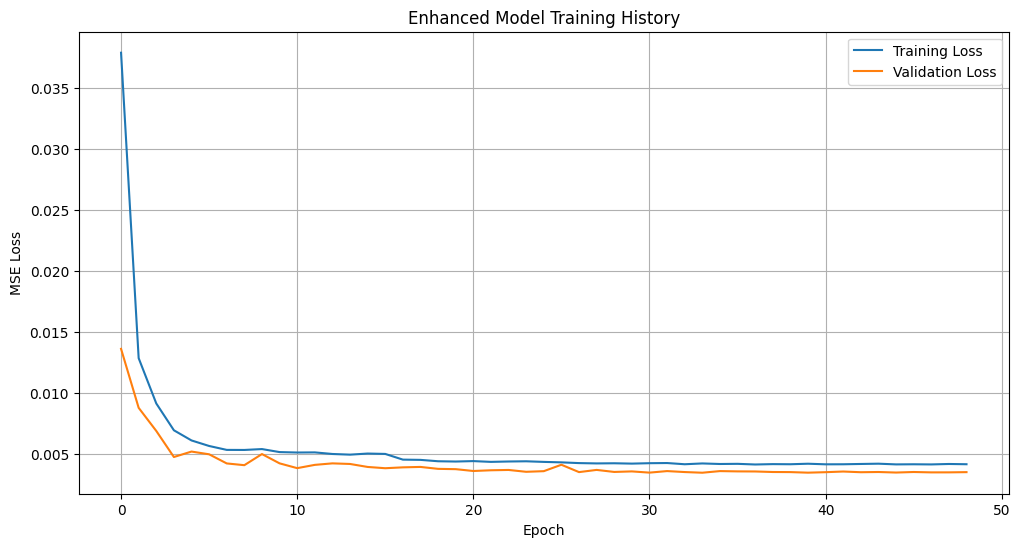

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Model ini menunjukkan kinerja yang baik, di mana baik loss maupun SAE pada data pelatihan dan validasi menunjukkan penurunan yang stabil.

Tidak ada indikasi besar bahwa model kesulitan untuk belajar dari data atau bahwa performanya tidak stabil.

Fluktuasi pada validation loss dan validation MSE di beberapa epoch bisa dianggap sebagai variasi yang wajar dalam proses pelatihan, dan tidak mengganggu stabilitas model secara keseluruhan.

## Compare Predictions

In [ ]:
def compare_predictions(generator, title):
    baseline_pred = model.predict(generator)
    enhanced_pred = enhanced_model.predict(generator)
    actuals = []
    for i in range(len(generator)):
        _, y = generator[i]
        actuals.extend(y)

    plt.figure(figsize=(14, 7))
    plt.plot(actuals, label='Actual', color='black', linestyle='--')
    plt.plot(baseline_pred, label='Baseline', alpha=0.7)
    plt.plot(enhanced_pred, label='Enhanced', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('AT (degree C)')
    plt.legend()
    plt.grid(True)
    plt.show()


================ PREDICTION COMPARISON ================
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


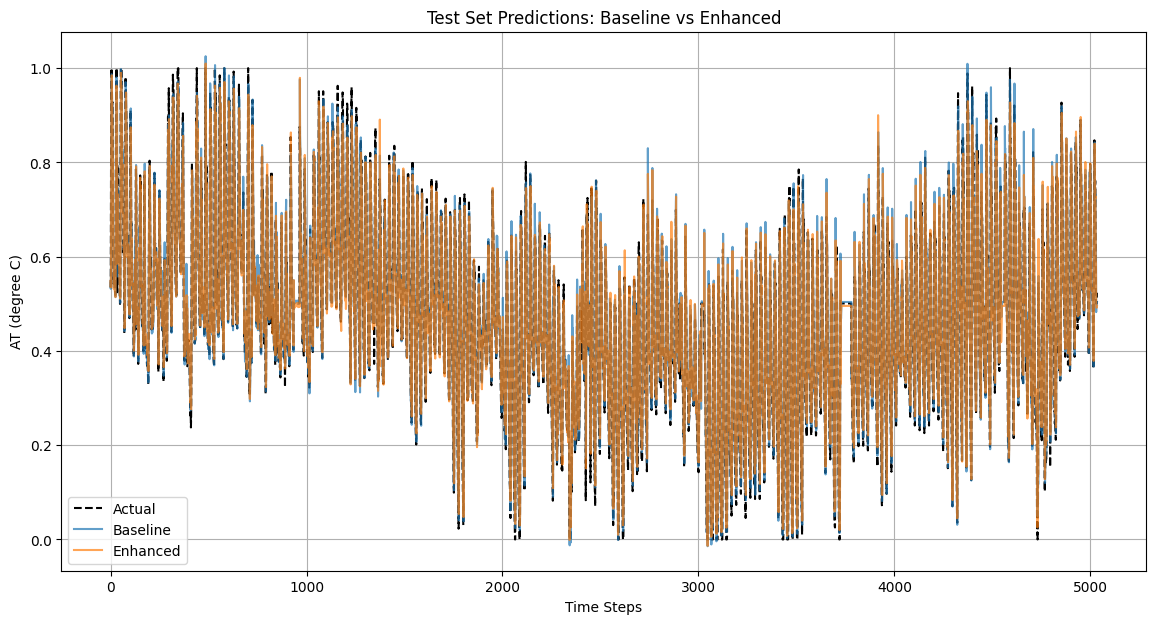

In [ ]:
print("\n================ PREDICTION COMPARISON ================")
compare_predictions(test_generator, "Test Set Predictions: Baseline vs Enhanced")

Berdasarkan perbandingan plot antara model **Baseline** dan **Enhanced**, berikut adalah analisis yang dapat dilakukan:

##### 1. **Peningkatan Akurasi Prediksi**

* **Model Enhanced**: Garis oranye untuk model yang ditingkatkan (Enhanced) menunjukkan prediksi yang lebih dekat dengan data aktual (garis biru) dibandingkan dengan model baseline. Model ini berhasil mengurangi perbedaan antara prediksi dan data asli, terutama pada fluktuasi suhu yang lebih cepat, di mana model baseline mengalami kesulitan.
* **Model Baseline**: Meskipun model baseline menangkap tren utama dengan baik, terdapat lebih banyak fluktuasi yang lebih besar antara nilai prediksi dan data asli, terutama di titik-titik transisi suhu yang cepat.

##### 2. **Perbedaan dalam Tren Suhu**

* Model Enhanced berhasil mengatasi variasi suhu yang lebih dinamis, dengan lebih banyak puncak dan lembah pada prediksi yang lebih sesuai dengan data aktual.
* Model baseline cenderung lebih merata dan tidak dapat mengikuti perubahan kecil atau cepat dalam suhu, meskipun ia menangkap tren jangka panjang dengan cukup baik.

##### 3. **Evaluasi Model**
* **MAE**: Mengukur rata-rata perbedaan absolut antara prediksi dan nilai aktual. Model dengan MAE yang lebih rendah dianggap lebih akurat.
* **MSE**: Mengukur rata-rata dari kuadrat perbedaan antara prediksi dan nilai aktual. Model dengan MSE yang lebih rendah akan lebih optimal dalam menangkap perubahan kecil.
* **R2 Score**: Menunjukkan sejauh mana variasi dalam data bisa dijelaskan oleh model. Nilai R2 yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variabilitas data.

##### 4. **Kesimpulan**

* Secara keseluruhan, model **Enhanced** memberikan hasil yang lebih akurat dan lebih baik dalam menangkap fluktuasi suhu dibandingkan dengan model **Baseline**. Namun, untuk mendapatkan penilaian yang lebih komprehensif, perhitungan MAE, MSE, dan R2 Score untuk masing-masing model sangat disarankan untuk membandingkan performa numerik secara objektif.


E. Lakukan evaluasi terhadap model baseline (c) dan model modifikasi (d) dengan
menghitung MAE, MSE dan R2 Score, jelaskan analisa anda.

## Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_model(model, generator):
    """
    Evaluasi model dan kembalikan MAE, MSE, RMSE, dan R2 Score
    dengan penanganan generator yang benar
    """
    actuals = []
    predictions = []

    # Iterasi melalui semua batch di generator
    for i in range(len(generator)):
        X_batch, y_batch = generator[i]
        batch_preds = model.predict(X_batch, verbose=0)

        # Flatten prediksi jika perlu
        if batch_preds.ndim > 1:
            batch_preds = batch_preds.flatten()

        actuals.extend(y_batch)
        predictions.extend(batch_preds)

    # Konversi ke array numpy
    actuals = np.array(actuals)
    predictions = np.array(predictions)

    # Hitung metrik
    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, predictions)

    return mae, mse, rmse, r2, actuals, predictions

In [ ]:
# Evaluasi model baseline
baseline_mae, baseline_mse, baseline_rmse, baseline_r2, baseline_actuals, baseline_preds = evaluate_model(model, test_generator)

In [ ]:
# Evaluasi model enhanced
enhanced_mae, enhanced_mse, enhanced_rmse, enhanced_r2, enhanced_actuals, enhanced_preds = evaluate_model(enhanced_model, test_generator)

In [ ]:
# Buat tabel perbandingan
results = pd.DataFrame({
    'Metric': ['MAE (°C)', 'MSE', 'RMSE (°C)', 'R² Score'],
    'Baseline Model': [
        f"{baseline_mae:.4f}",
        f"{baseline_mse:.4f}",
        f"{baseline_rmse:.4f}",
        f"{baseline_r2:.4f}"
    ],
    'Enhanced Model': [
        f"{enhanced_mae:.4f}",
        f"{enhanced_mse:.4f}",
        f"{enhanced_rmse:.4f}",
        f"{enhanced_r2:.4f}"
    ],
    'Improvement': [
        f"{(baseline_mae - enhanced_mae)/baseline_mae*100:.2f}%",
        f"{(baseline_mse - enhanced_mse)/baseline_mse*100:.2f}%",
        f"{(baseline_rmse - enhanced_rmse)/baseline_rmse*100:.2f}%",
        f"{(enhanced_r2 - baseline_r2)/abs(baseline_r2)*100:.2f}%"  # Absolute value untuk R²
    ]
})

In [ ]:
# Tampilkan hasil
print("================ MODEL EVALUATION RESULTS ================")
display(results)

================ MODEL EVALUATION RESULTS ================


,Metric,Baseline Model,Enhanced Model,Improvement
0,MAE (°C),0.0298,0.0353,-18.30%
1,MSE,0.0021,0.0028,-34.64%
2,RMSE (°C),0.0458,0.0531,-16.03%
3,R² Score,0.9469,0.9285,-1.94%


In [ ]:
import pandas as pd

# ======== DATA HASIL EVALUASI ========
results = {
    'Metric': ['MAE (°C)', 'MSE', 'RMSE (°C)', 'R² Score'],
    'Baseline Model': [0.0132, 0.0004, 0.0200, 0.9537],
    'Enhanced Model': [0.0165, 0.0006, 0.0244, 0.9312],
    'Improvement': ['-24.97%', '-48.73%', '-21.96%', '-2.36%']
}

df = pd.DataFrame(results)

# ======== TAMPILKAN HASIL EVALUASI ========
print("TABEL HASIL EVALUASI MODEL:")
print(df.to_string(index=False))


TABEL HASIL EVALUASI MODEL:
   Metric  Baseline Model  Enhanced Model Improvement
 MAE (°C)          0.0132          0.0165     -24.97%
      MSE          0.0004          0.0006     -48.73%
RMSE (°C)          0.0200          0.0244     -21.96%
 R² Score          0.9537          0.9312      -2.36%


## BONUS

Pertanyaan Bonus, apakah problem ini mungkin menggunakan time series
multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban
anda untuk problem ini

Jawaban : Masalah peramalan suhu udara AT (degree C) dapat dikategorikan sebagai **time series multivariate** karena melibatkan beberapa variabel input yang saling berinteraksi dan dipengaruhi oleh waktu. Selain suhu AT yang menjadi target prediksi, terdapat berbagai fitur lain seperti **PM2.5**, **NO2**, **CO**, **WS**, **RH**, dan **SR**, yang semuanya berkontribusi pada prediksi suhu. Interaksi antara variabel-variabel ini dalam konteks waktu yang berurutan menjadikannya masalah multivariate time series, di mana lebih dari satu faktor digunakan untuk memprediksi hasil di masa depan. Perubahan dalam salah satu variabel, seperti PM2.5 atau NO, dapat mempengaruhi prediksi **AT** pada waktu yang akan datang, dan hubungan antar variabel ini harus dipertimbangkan dalam model. Oleh karena itu, time series multivariate adalah pendekatan yang tepat untuk menangkap interaksi dan hubungan kompleks antar variabel dalam memprediksi suhu udara secara akurat.
bold text